In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simulate_ctmc import (rate_matrix,
                           simulate_ctmc_one_molecule,
                           count_photon_cycles_in_frames
                           )

from sofi_tools import  generate_trace

# Blinking 

In [2]:
# Experiment setup dictionary
experiment_setup = {
    "protocol": "Blinking",
    "experiment_duration": None,  # s
    "num_frames": 1000,            # frames
    "frame_length": 1e-2,         # s
    "excitation_P": 1,          # W/cm^2
    "activation_P": None,         # W/cm^2
    "excitation_wavelength": 647  # nm
}

# Molecule parameters dictionary
molecule = {
    "epsilon": 239000,                          # Extinction coefficient M^-1 cm^-1
    "excitation_lifetime": 1e-9,                # Excited state lifetime, s (1 ns)
    "num_cycles_before_bleaching": 1e5,         # Number of cycles before bleaching
    "alpha_nr": 1e-8,                           # propotional to Quantum yield
    "d_E": 0.5,                                 # Energy difference (eV), typically 0.5 - 1.5 eV
    "alpha_isc": 1e7                           # Intersystem crossing rate, between 1e-4 and 1e-2
}

if experiment_setup["experiment_duration"] is None:
    experiment_setup["experiment_duration"] = experiment_setup["num_frames"] * experiment_setup["frame_length"]


In [3]:
Q,_=rate_matrix(
        protocol=experiment_setup["protocol"], 
        epsilon=molecule["epsilon"], 
        excitation_lifetime=molecule["excitation_lifetime"], 
        excitation_wavelength=experiment_setup["excitation_wavelength"], 
        N_c=molecule["num_cycles_before_bleaching"], 
        excitation_P=experiment_setup["excitation_P"], 
        alpha_nr=molecule["alpha_nr"], 
        d_E=molecule["d_E"], 
        activation_P=experiment_setup["activation_P"], 
        alpha_isc=molecule["alpha_isc"]
    )


(Q[0,1]*Q[1,0])/(Q[0,1]+Q[1,0])/Q[1,2]

why am i here ? Blinking


0.0004903999102708968

In [4]:

def simulate_protocol(experiment_setup, molecule,seed=None):
    

    Q, initial_state = rate_matrix(
        protocol=experiment_setup["protocol"], 
        epsilon=molecule["epsilon"], 
        excitation_lifetime=molecule["excitation_lifetime"], 
        excitation_wavelength=experiment_setup["excitation_wavelength"], 
        N_c=molecule["num_cycles_before_bleaching"], 
        excitation_P=experiment_setup["excitation_P"], 
        alpha_nr=molecule["alpha_nr"], 
        d_E=molecule["d_E"], 
        activation_P=experiment_setup["activation_P"], 
        alpha_isc=molecule["alpha_isc"]
    )

    times, dynamics = simulate_ctmc_one_molecule(Q, 
                               initial_state, 
                               experiment_setup['experiment_duration'],
                               protocol = experiment_setup["protocol"], 
                               seed=seed)
    
    photons = count_photon_cycles_in_frames(times,dynamics,experiment_setup["frame_length"], experiment_setup["num_frames"], photon_emitting_state=1, ground_state=0)

    return times, dynamics,Q,photons

## Realisations

why am i here ? Blinking


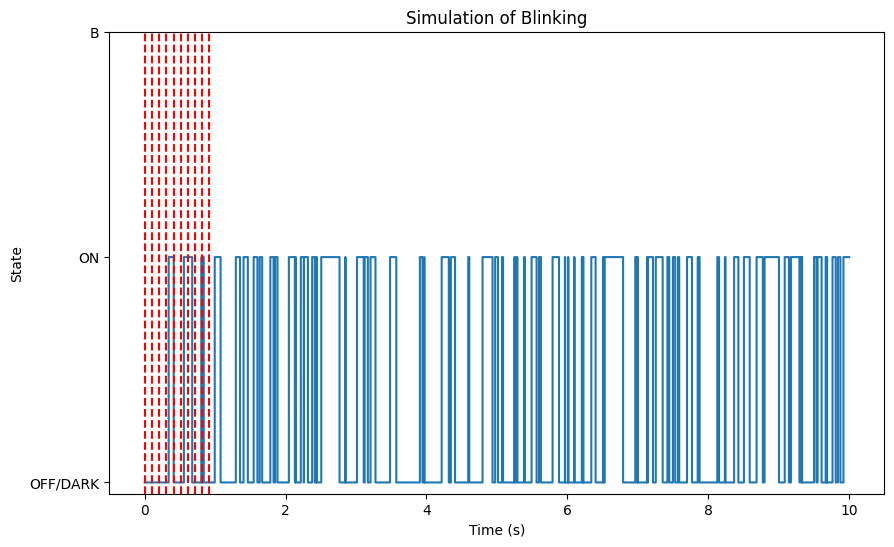

In [5]:
 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# Example of the modified code to include a zoomed-in inset with a red box
times, dynamics, Q, photons = simulate_protocol(experiment_setup, molecule, seed=4)


dynamics_regime=np.copy(dynamics)
dynamics_regime[(dynamics==0) | (dynamics==1) ] = 1
dynamics_regime[dynamics==2 ] = 0
# Dynamics plot with zoomed-in inset
fig, ax = plt.subplots(figsize=(10, 6))

# Main plot
ax.step(times, dynamics_regime, where='post')
for j in range(1,100,10):
    ax.axvline(x=j*experiment_setup['frame_length'], color='red', linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('State')
ax.set_title('Simulation of Blinking')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['OFF/DARK', 'ON', 'B'])

# Saving the plot
plt.show()


In [136]:
experiment_setup['frame_length']

0.01

[2 0 1 ... 1 0 0]


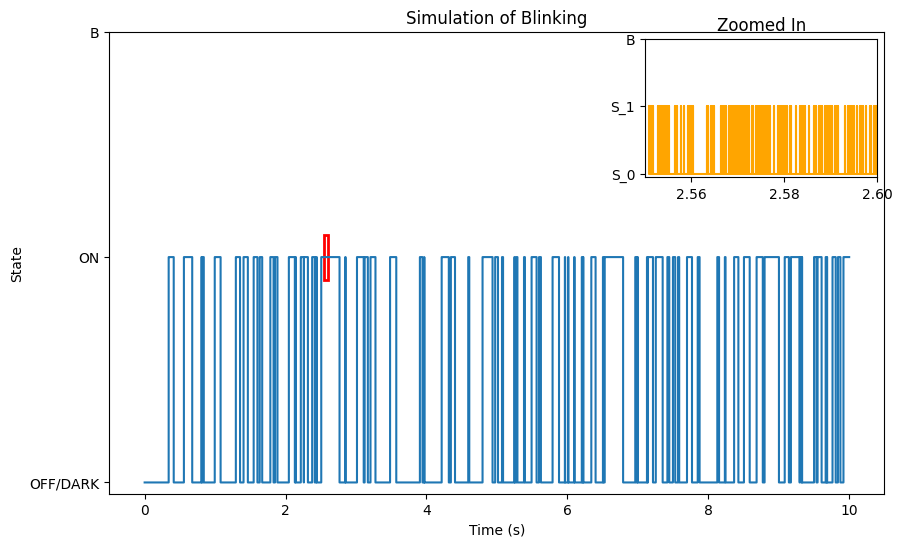

([<matplotlib.axis.YTick at 0x7e6848c4a6e0>,
 [Text(0, 0, 'S_0'), Text(0, 1, 'S_1'), Text(0, 2, 'T1'), Text(0, 3, 'B')])

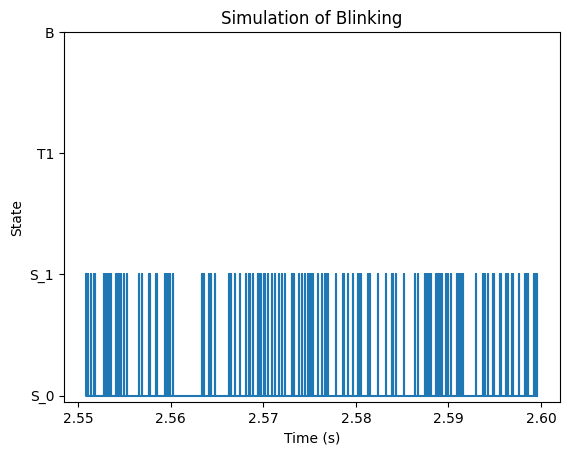

In [81]:
 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# Example of the modified code to include a zoomed-in inset with a red box
times, dynamics, Q, photons = simulate_protocol(experiment_setup, molecule, seed=4)


dynamics_regime=np.copy(dynamics)
dynamics_regime[(dynamics==0) | (dynamics==1) ] = 1
dynamics_regime[dynamics==2 ] = 0
# Dynamics plot with zoomed-in inset
fig, ax = plt.subplots(figsize=(10, 6))

# Main plot
ax.step(times, dynamics_regime, where='post')
ax.set_xlabel('Time (s)')
ax.set_ylabel('State')
ax.set_title('Simulation of Blinking')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['OFF/DARK', 'ON', 'B'])

# Adding zoomed-in inset
inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper right')

# Define the time window for the zoom
zoom_start = 2.55  # Adjust these values as needed
zoom_end = 2.6
inset_times = times[(times >= zoom_start) & (times <= zoom_end)]
inset_dynamics = dynamics[(times >= zoom_start) & (times <= zoom_end)]
print(dynamics)
inset_ax.step(inset_times, inset_dynamics, where='post', color='orange')
inset_ax.set_xlim(zoom_start, zoom_end)
inset_ax.set_yticks([0, 1 ,2])
inset_ax.set_yticklabels(['S_0', 'S_1', 'B'])

inset_ax.set_title('Zoomed In')

# Adding a red box around the zoomed-in area in the main plot
rect = Rectangle((zoom_start, 0.9), zoom_end - zoom_start, 0.2, 
                 linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Saving the plot
plt.show()

plt.step(times[(times >= zoom_start) & (times <= zoom_end)], dynamics[(times >= zoom_start) & (times <= zoom_end)], where='post')
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.title(f'Simulation of {experiment_setup["protocol"]}')
plt.yticks(range(Q.shape[0]), ['S_0', 'S_1', 'T1', 'B'])


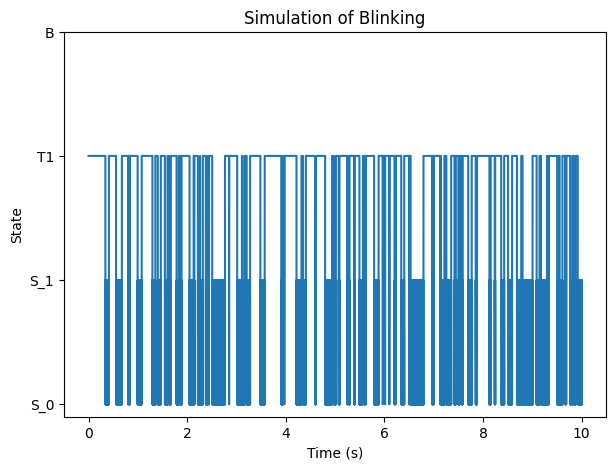

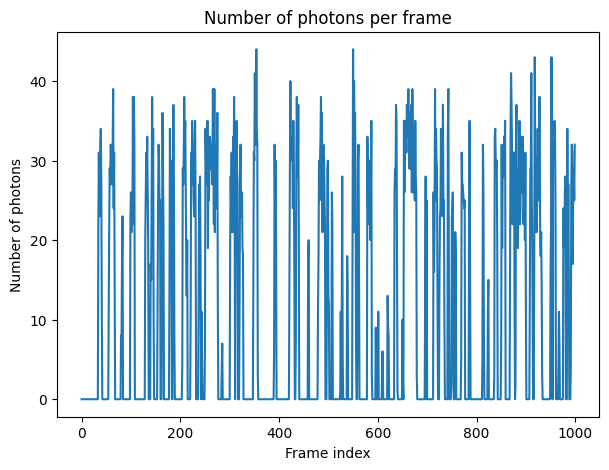

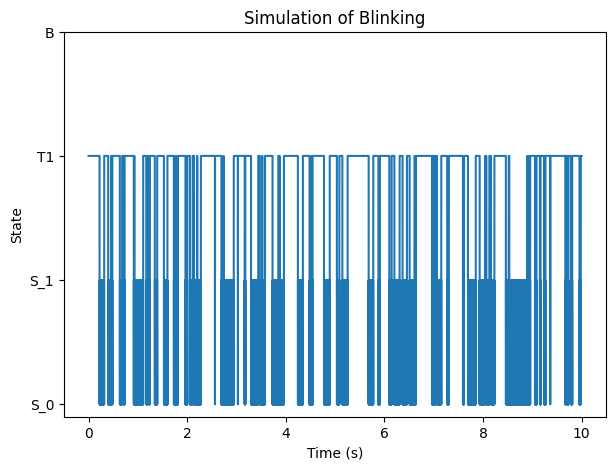

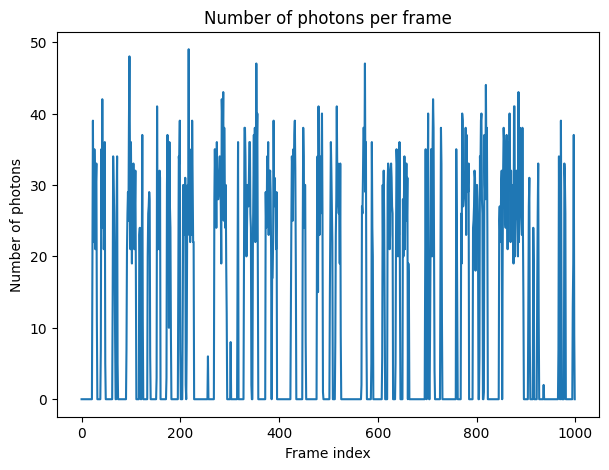

In [18]:

for i in [4,6]:
    times, dynamics, Q, photons = simulate_protocol(experiment_setup, molecule, seed=i)

    plt.figure(figsize=(7,5))

    # Plot the dynamics on the first subplot
    s, e = 0, -1
    plt.step(times[s:], dynamics[s:], where='post')
    plt.xlabel('Time (s)')
    plt.ylabel('State')
    plt.title(f'Simulation of {experiment_setup["protocol"]}')
    plt.yticks(range(Q.shape[0]), ['S_0', 'S_1', 'T1', 'B'])
    plt.savefig(f'Blinking Output/Dynamics/Simulation molecule{i}.png')

    plt.figure(figsize=(7,5))
    plt.plot(photons)
    plt.xlabel('Frame index')
    plt.ylabel('Number of photons')
    plt.title('Number of photons per frame')
    plt.savefig(f'Blinking Output/Photons/Simulation molecule{i}_photons.png')

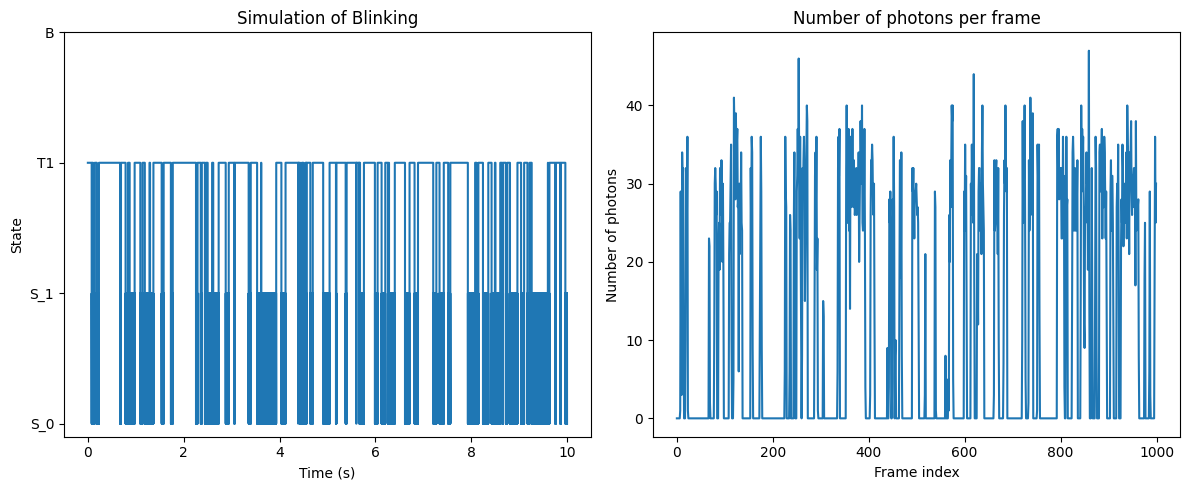

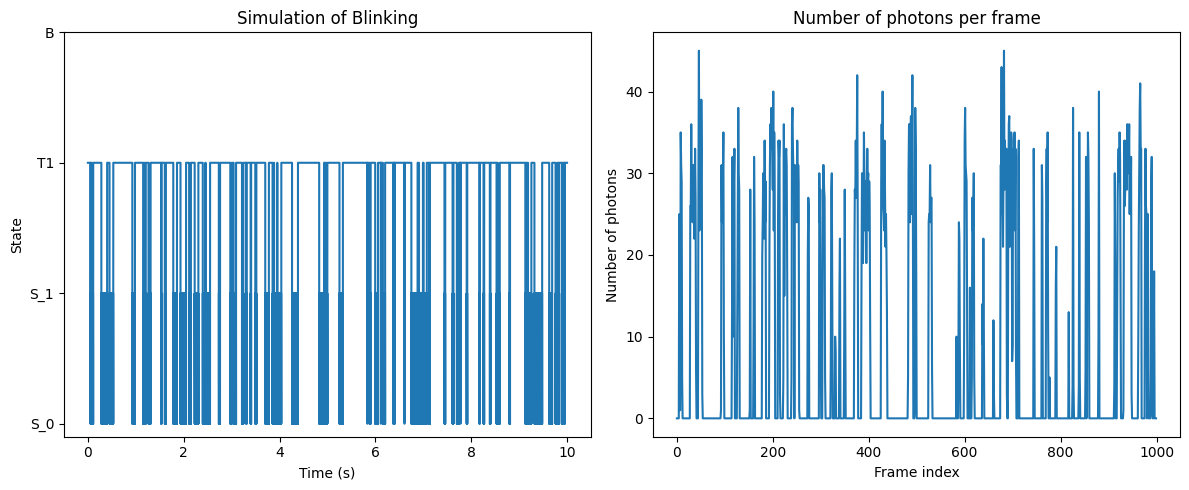

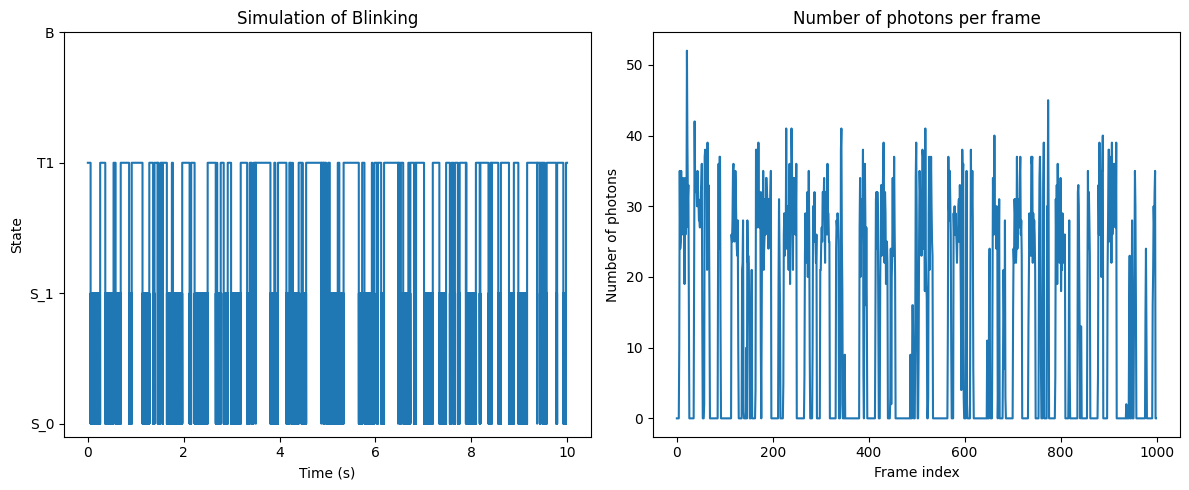

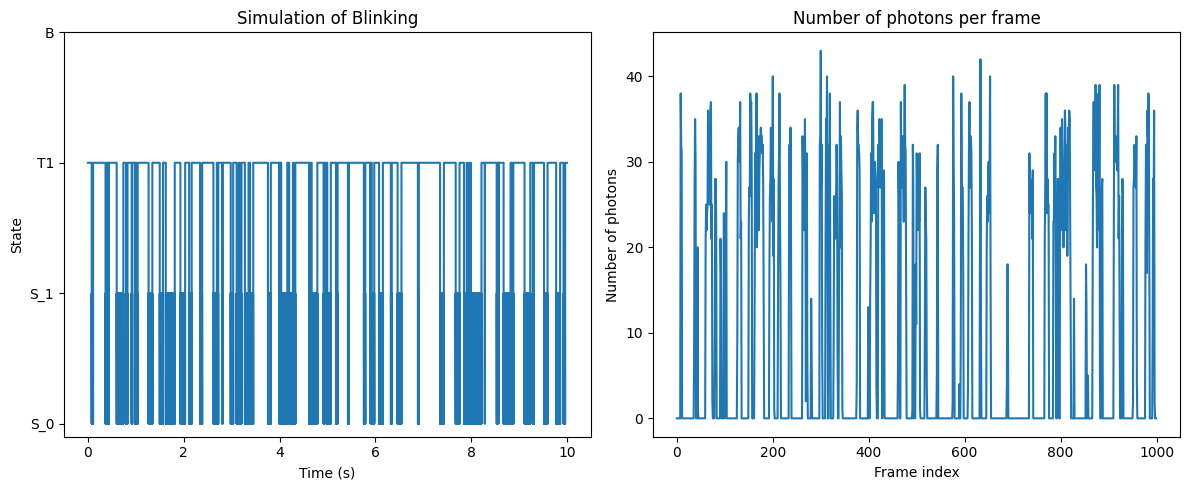

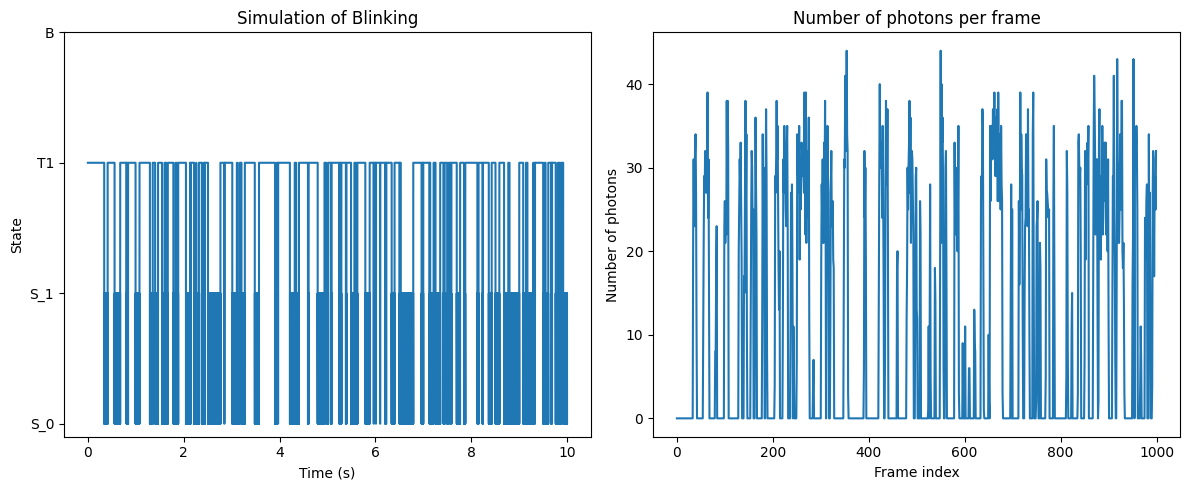

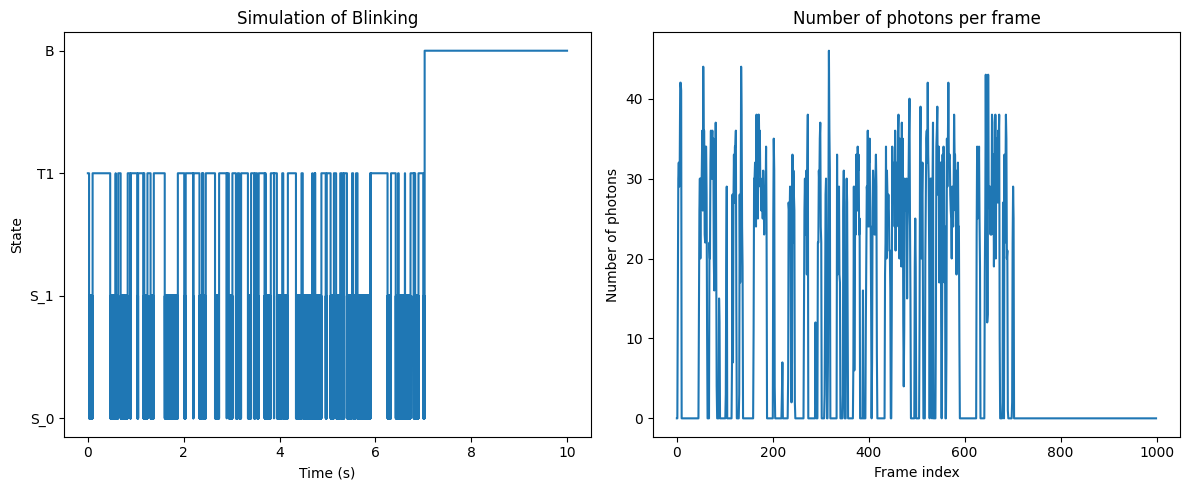

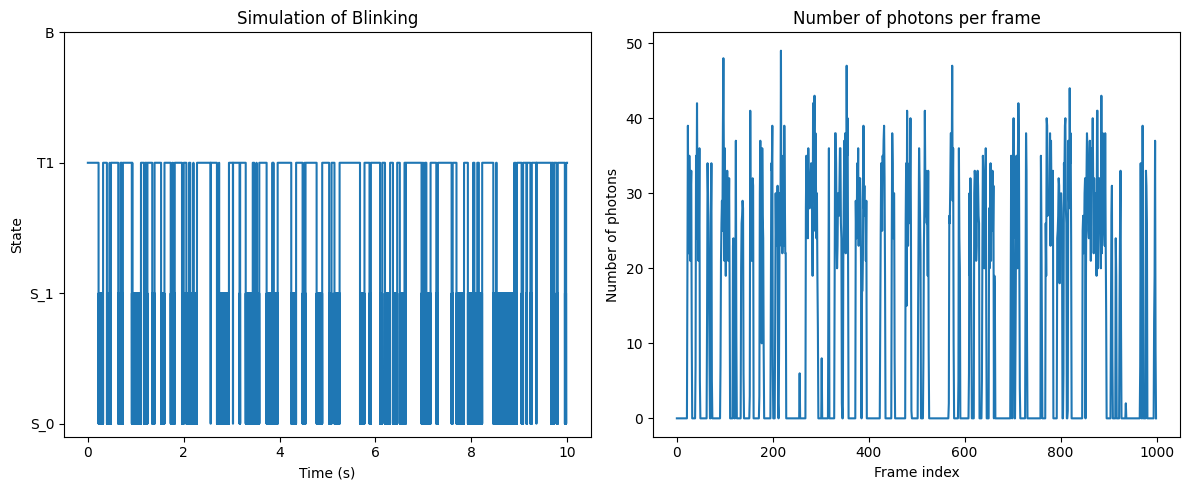

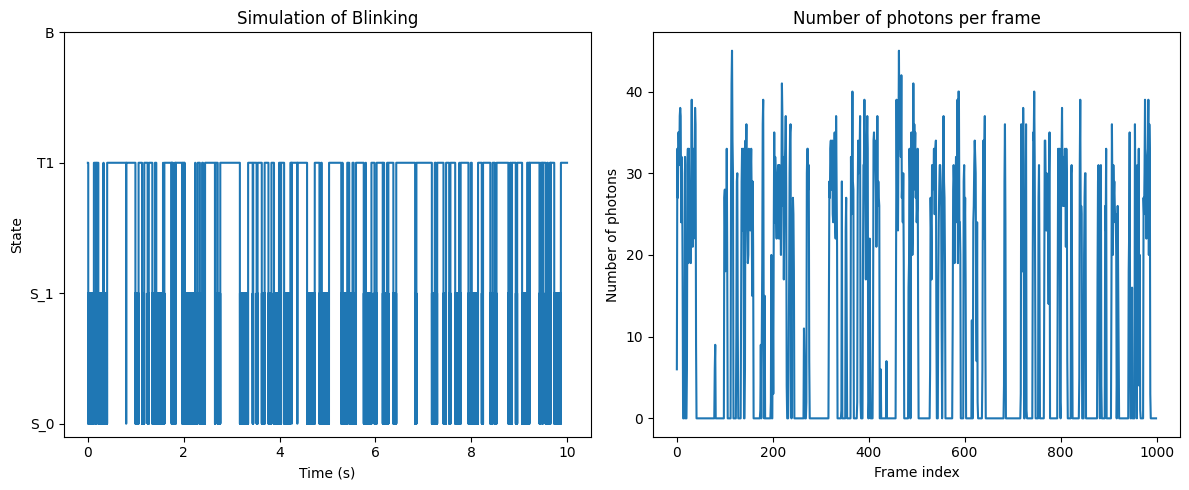

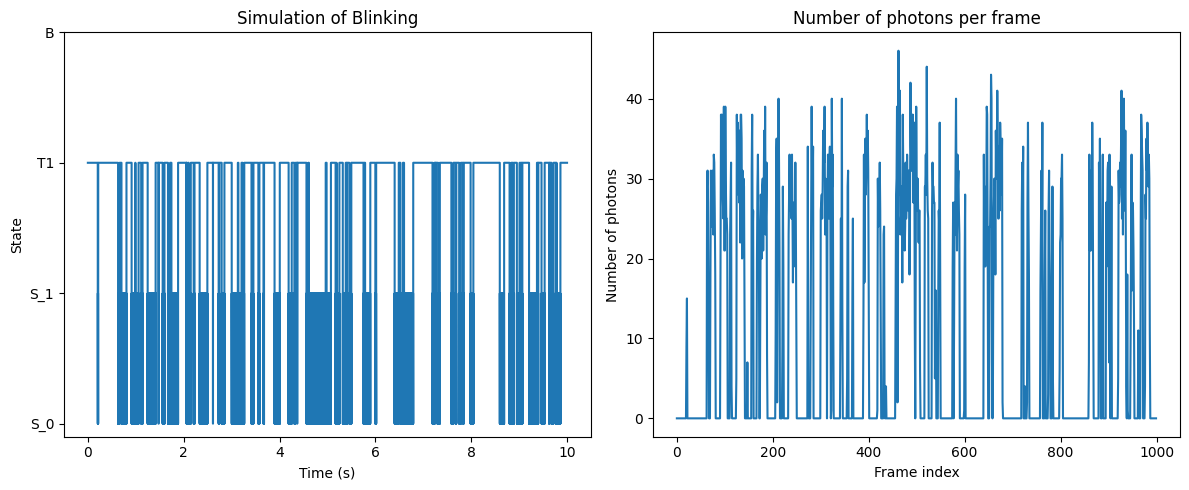

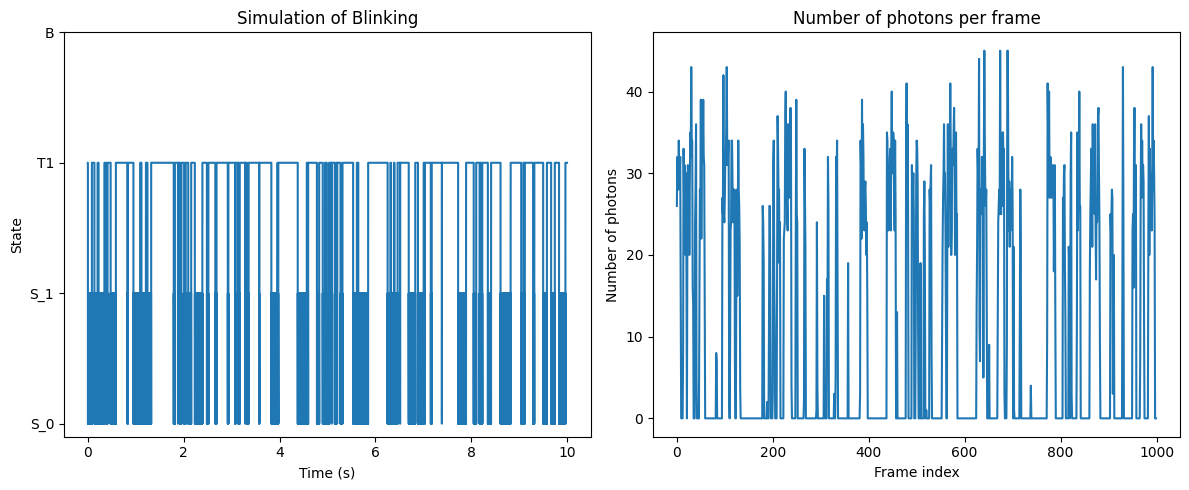

In [6]:

for i in range(10):
    times, dynamics, Q, photons = simulate_protocol(experiment_setup, molecule, seed=i)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the dynamics on the first subplot
    s, e = 0, -1
    ax1.step(times[s:], dynamics[s:], where='post')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('State')
    ax1.set_title(f'Simulation of {experiment_setup["protocol"]}')
    ax1.set_yticks(range(Q.shape[0]))
    ax1.set_yticklabels(['S_0', 'S_1', 'T1', 'B'])

    # Plot the photon count on the second subplot
    ax2.plot(photons)
    ax2.set_xlabel('Frame index')
    ax2.set_ylabel('Number of photons')
    ax2.set_title('Number of photons per frame')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()



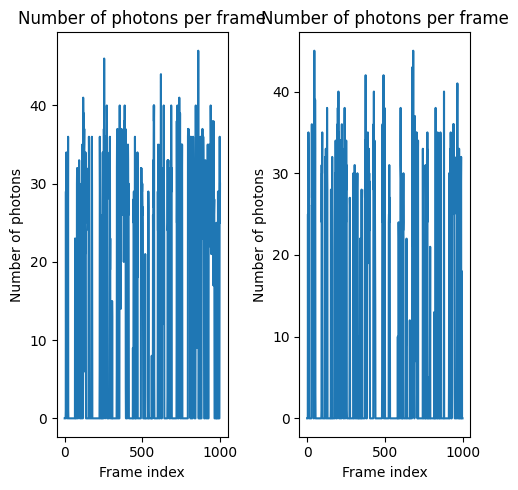

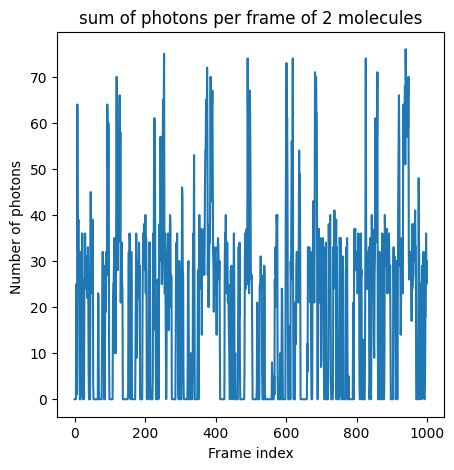

In [7]:

times, dynamics, Q, photons1 = simulate_protocol(experiment_setup, molecule, seed=0)



# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))

# Plot the photon count on the second subplot
ax1.plot(photons1)
ax1.set_xlabel('Frame index')
ax1.set_ylabel('Number of photons')
ax1.set_title('Number of photons per frame')
# Plot the photon count on the second subplot
ax2.plot(photons2)
ax2.set_xlabel('Frame index')
ax2.set_ylabel('Number of photons')
ax2.set_title('Number of photons per frame')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Plot the photon count on the second subplot
plt.figure(figsize=(5,5))
plt.plot(photons1 +photons2)
plt.xlabel('Frame index')
plt.ylabel('Number of photons ')
plt.title('sum of photons per frame of 2 molecules')
plt.show()

In [8]:
def find_last_nonzero_before_zeros(arr):
    # Find indices of non-zero elements
    non_zero_indices = np.nonzero(arr)[0]
    
    if len(non_zero_indices) == 0:
        return None  # No non-zero elements found
    
    # Find the last non-zero index
    last_non_zero_index = non_zero_indices[-1]
    
    # Check if there are only zeros after the last non-zero element
    if np.all(arr[last_non_zero_index+1:] == 0):
        return last_non_zero_index+1
    else:
        return None
    
bleaching_frame = find_last_nonzero_before_zeros(photons2)
plateau1 =  (photons1 +photons2)[:bleaching_frame]
plateau2 =  (photons1 +photons2)[bleaching_frame:]

Mean1: 0.4676875808521144, Mean2: 0.5142338455947184
Std1: 0.2987247786118156, Std2: 0.314632470360115
Median1: 0.4836315435101106, Median2: 0.5128973526994166
IQR1: 0.5520511934882153, IQR2: 0.6029336356975914
KS Test Statistic: 0.11666666666666667, p-value: 0.36847493005920456


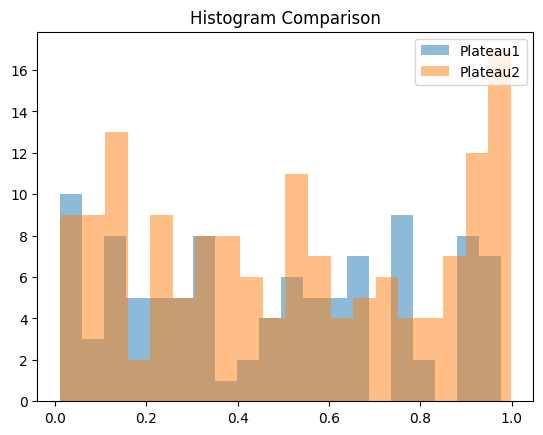

Jensen-Shannon Divergence: 0.26671966724577756
Earth Mover's Distance: 0.0477490943736578
Spearman's Rank Correlation: -0.15366336633663366
Mann-Whitney U Test Statistic: 6853.0, p-value: 0.2484229843504745
Entropy1: 2.7796669972680776, Entropy2: 2.8859282038959937


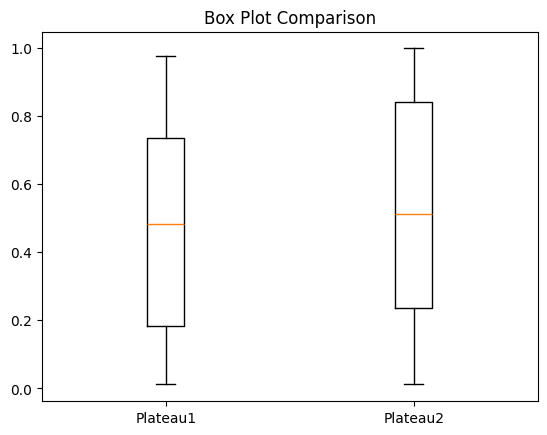

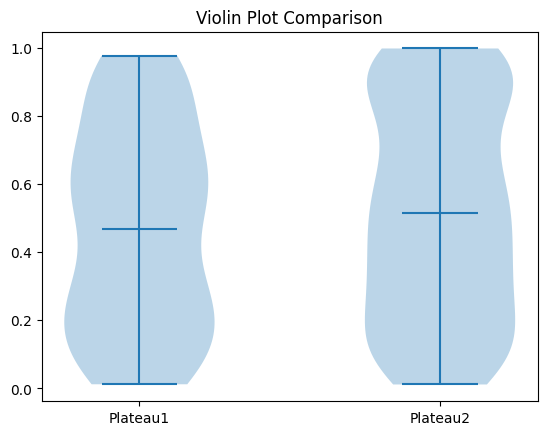

In [61]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon, euclidean
from scipy.stats import entropy, mannwhitneyu

# Assuming plateau1 and plateau2 are your arrays
plateau1 = np.random.rand(100)  # Replace with your actual data
plateau2 = np.random.rand(150)  # Replace with your actual data

# 1. Statistical Summaries
mean1, mean2 = np.mean(plateau1), np.mean(plateau2)
std1, std2 = np.std(plateau1), np.std(plateau2)
median1, median2 = np.median(plateau1), np.median(plateau2)
iqr1, iqr2 = np.percentile(plateau1, 75) - np.percentile(plateau1, 25), \
             np.percentile(plateau2, 75) - np.percentile(plateau2, 25)

print(f"Mean1: {mean1}, Mean2: {mean2}")
print(f"Std1: {std1}, Std2: {std2}")
print(f"Median1: {median1}, Median2: {median2}")
print(f"IQR1: {iqr1}, IQR2: {iqr2}")

# 2. Distribution Comparison
# Kolmogorov-Smirnov Test
ks_stat, ks_p_value = stats.ks_2samp(plateau1, plateau2)
print(f"KS Test Statistic: {ks_stat}, p-value: {ks_p_value}")

# Histograms
plt.hist(plateau1, bins=20, alpha=0.5, label='Plateau1')
plt.hist(plateau2, bins=20, alpha=0.5, label='Plateau2')
plt.legend(loc='upper right')
plt.title('Histogram Comparison')
plt.show()

# 3. Distance Metrics
# Jensen-Shannon Divergence
js_divergence = jensenshannon(np.histogram(plateau1, bins=20, density=True)[0],
                              np.histogram(plateau2, bins=20, density=True)[0])
print(f"Jensen-Shannon Divergence: {js_divergence}")

# Earth Mover's Distance
emd = stats.wasserstein_distance(plateau1, plateau2)
print(f"Earth Mover's Distance: {emd}")

# 4. Rank-Based Metrics
# Spearman's Rank Correlation
spearman_corr, _ = stats.spearmanr(plateau1, plateau2[:len(plateau1)])
print(f"Spearman's Rank Correlation: {spearman_corr}")

# Mann-Whitney U Test
u_stat, u_p_value = mannwhitneyu(plateau1, plateau2)
print(f"Mann-Whitney U Test Statistic: {u_stat}, p-value: {u_p_value}")

# 5. Entropy-Based Measures
# Shannon Entropy
entropy1 = entropy(np.histogram(plateau1, bins=20, density=True)[0])
entropy2 = entropy(np.histogram(plateau2, bins=20, density=True)[0])
print(f"Entropy1: {entropy1}, Entropy2: {entropy2}")

# Visualization
# Box Plots
plt.boxplot([plateau1, plateau2], labels=['Plateau1', 'Plateau2'])
plt.title('Box Plot Comparison')
plt.show()

# Violin Plots
plt.violinplot([plateau1, plateau2], showmeans=True)
plt.xticks([1, 2], ['Plateau1', 'Plateau2'])
plt.title('Violin Plot Comparison')
plt.show()


## Compare to sofi

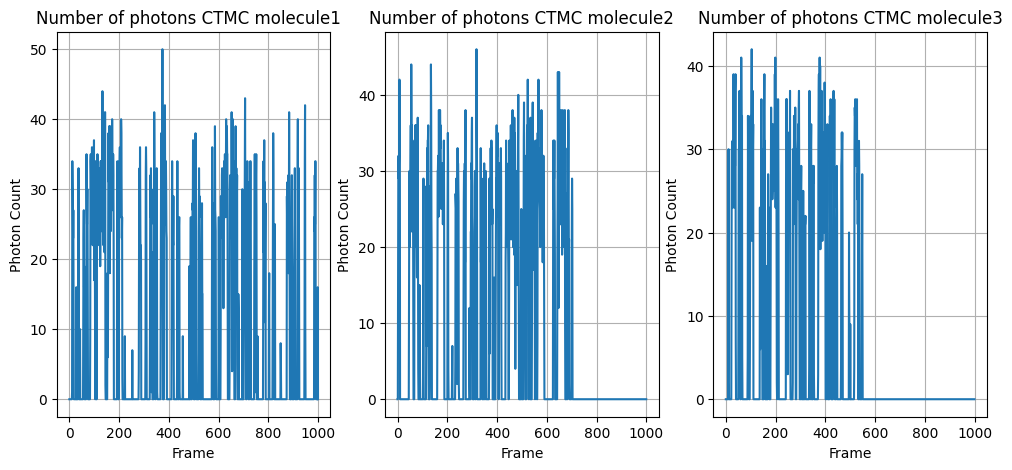

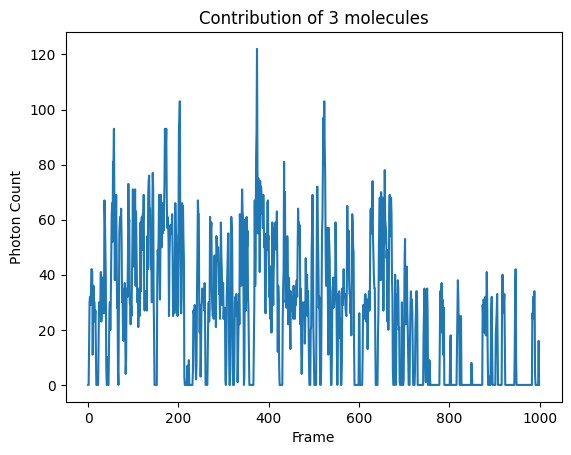

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Assume generate_trace is a predefined function
# Replace with your actual function definition if needed

Ion = 50
Ton = 5
Toff = 20
Tbl = 100


_,_,_,photons_ctmc1 = simulate_protocol(experiment_setup, molecule, seed=123)
_,_,_,photons_ctmc2 = simulate_protocol(experiment_setup, molecule, seed=5)
_,_,_,photons_ctmc3 = simulate_protocol(experiment_setup, molecule, seed=18)
# times, _, photons_sofi1, state_vector = generate_trace(Ion, Ton, Toff, Tbl, experiment_setup["num_frames"], dynamics=True, seed=12)
# times, _, photons_sofi2, state_vector = generate_trace(Ion, Ton, Toff, Tbl, experiment_setup["num_frames"], dynamics=True, seed=6)

# # Clip photon values to the desired range
# photons_sofi1[photons_sofi1 < 0] = 0
# photons_sofi1[photons_sofi1 > Ion] = 0

# photons_sofi2[photons_sofi2 < 0] = 0
# photons_sofi2[photons_sofi2 > Ion] = 0

# Create a figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))


ax1.plot(np.arange(len(photons_ctmc1)), photons_ctmc1)  # Use direct cumulative photons array
ax1.set_xlabel('Frame')
ax1.set_ylabel('Photon Count')
ax1.set_title('Number of photons CTMC molecule1  ')
ax1.grid(True)



# Plot the intensity trace on the second subplot
ax2.plot(np.arange(len(photons_ctmc2)), photons_ctmc2)  # Use direct cumulative photons array
ax2.set_xlabel('Frame')
ax2.set_ylabel('Photon Count')
ax2.set_title('Number of photons CTMC molecule2')
ax2.grid(True)

# Plot the intensity trace on the second subplot
ax3.plot(np.arange(len(photons_ctmc3)), photons_ctmc3)  # Use direct cumulative photons array
ax3.set_xlabel('Frame')
ax3.set_ylabel('Photon Count')
ax3.set_title('Number of photons CTMC molecule3')
ax3.grid(True)


plt.show()


plt.figure()
plt.plot(np.arange(len(photons_ctmc2)), photons_ctmc1+photons_ctmc2+photons_ctmc3)
plt.xlabel('Frame')
plt.ylabel('Photon Count')
plt.title('Contribution of 3 molecules')
ax2.grid(True)
plt.show()

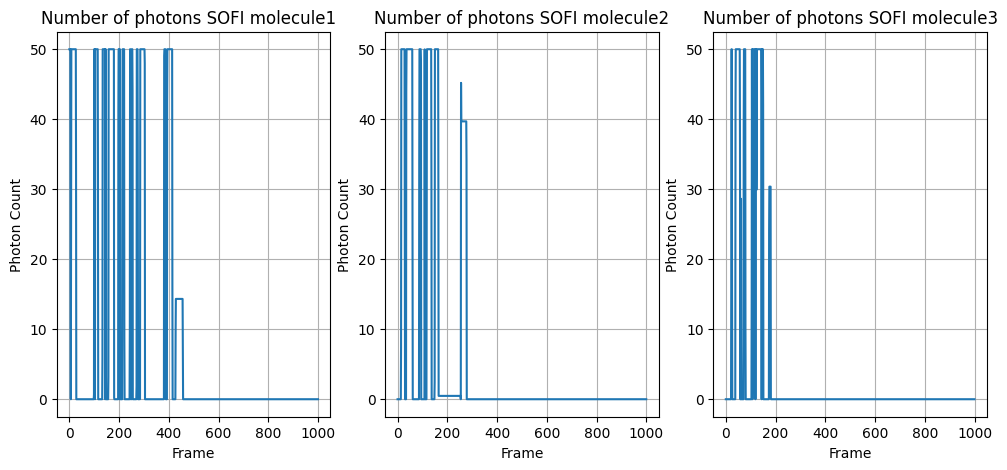

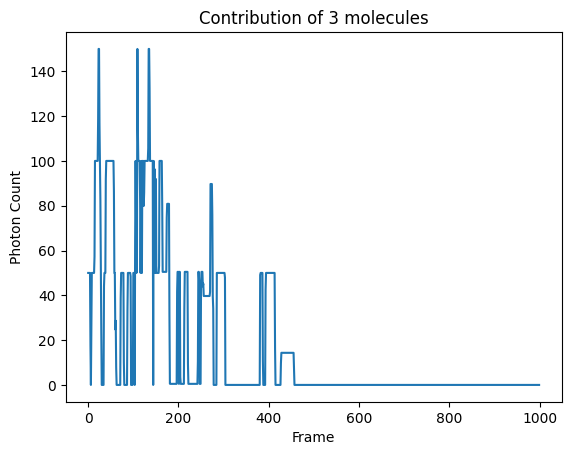

In [112]:
def find_bleaching_index(arr):
    for i in range(len(arr)):
        if arr[i] == 0 and np.all(arr[i:] == 0):
            return i
    return None  # Return None if no bleaching index is found
# Assume generate_trace is a predefined function
# Replace with your actual function definition if needed

Ion = np.max(photons_ctmc1)
Ton = 10
Toff = 15
Tbl = 200


# _,_,_,photons_ctmc1 = simulate_protocol(experiment_setup, molecule, seed=123)
# _,_,_,photons_ctmc2 = simulate_protocol(experiment_setup, molecule, seed=5)
# _,_,_,photons_ctmc3 = simulate_protocol(experiment_setup, molecule, seed=18)
times, _, photons_sofi1, state_vector = generate_trace(Ion, Ton, Toff, Tbl, experiment_setup["num_frames"], dynamics=True, seed=14)
times, _, photons_sofi2, state_vector = generate_trace(Ion, Ton, Toff, Tbl, experiment_setup["num_frames"], dynamics=True, seed=23)
times, _, photons_sofi3, state_vector = generate_trace(Ion, Ton, Toff, Tbl, experiment_setup["num_frames"], dynamics=True, seed=28)

# # Clip photon values to the desired range
photons_sofi1[photons_sofi1 < 0] = 0
photons_sofi1[photons_sofi1 > Ion] = 0

photons_sofi2[photons_sofi2 < 0] = 0
photons_sofi2[photons_sofi2 > Ion] = 0

photons_sofi3[photons_sofi3 < 0] = 0
photons_sofi3[photons_sofi3 > Ion] = 0

bleaching_frame1 = find_bleaching_index(photons_sofi1)
bleaching_frame2 = find_bleaching_index(photons_sofi2)
bleaching_frame3 = find_bleaching_index(photons_sofi3)

# Create a figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))


ax1.plot(np.arange(len(photons_sofi1)), photons_sofi1)  # Use direct cumulative photons array
ax1.set_xlabel('Frame')
ax1.set_ylabel('Photon Count')
ax1.set_title('Number of photons SOFI molecule1  ')
ax1.grid(True)



# Plot the intensity trace on the second subplot
ax2.plot(np.arange(len(photons_sofi2)), photons_sofi2)  # Use direct cumulative photons array
ax2.set_xlabel('Frame')
ax2.set_ylabel('Photon Count')
ax2.set_title('Number of photons SOFI molecule2')
ax2.grid(True)

# Plot the intensity trace on the second subplot
ax3.plot(np.arange(len(photons_sofi3)), photons_sofi3)  # Use direct cumulative photons array
ax3.set_xlabel('Frame')
ax3.set_ylabel('Photon Count')
ax3.set_title('Number of photons SOFI molecule3')
ax3.grid(True)


plt.show()


plt.figure()
plt.plot(np.arange(len(photons_sofi2)), photons_sofi1+photons_sofi2+photons_sofi3)
plt.xlabel('Frame')
plt.ylabel('Photon Count')
plt.title('Contribution of 3 molecules')
ax2.grid(True)
plt.show()

array([111, 751, 994])

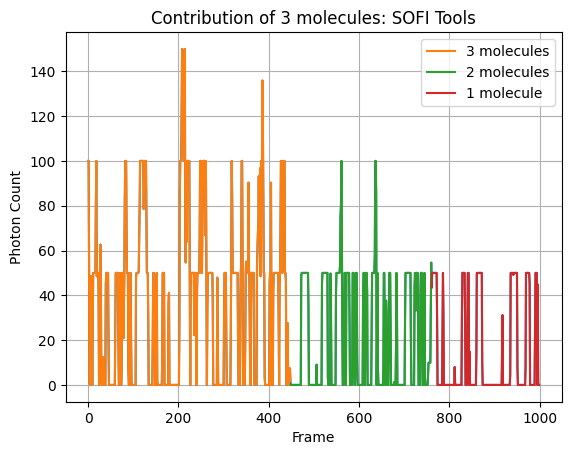

In [97]:
contributions =photons_sofi1 + photons_sofi2+photons_sofi3
bleachings = np.sort([bleaching_frame1,bleaching_frame2,bleaching_frame3])
plateau1 = contributions[:bleachings[0]]
plateau2 = contributions[bleachings[0]:bleachings[1]]
plateau3 = contributions[bleachings[1]:]

plt.figure()
plt.plot(np.arange(len(photons_sofi1)),contributions)
plt.plot(np.arange(len(plateau1)), plateau1, label="3 molecules")
plt.plot(np.arange(len(plateau1), len(plateau1)+len(plateau2)), plateau2, label="2 molecules")
plt.plot(np.arange(len(plateau1)+len(plateau2), len(plateau1)+len(plateau2)+len(plateau3)), plateau3, label="1 molecule")
plt.xlabel('Frame')
plt.ylabel('Photon Count')
plt.title('Contribution of 3 molecules: SOFI Tools')
plt.grid(True)
plt.legend()
plt.show()


sofi_model = study_variability([plateau1, plateau2, plateau3])

In [98]:
import numpy as np
from scipy.stats import skew, kurtosis

def study_variability(plateaus):
    variability_metrics = {
        'CV': [],
        'Standard Deviation': [],
        'Variance': [],
        'Range': [],
        'IQR': [],
        'MAD': [],
        'Skewness': [],
        'Kurtosis': []
    }
    
    for plateau in plateaus:
        mean_value = np.mean(plateau)
        std_dev = np.std(plateau)
        variance = np.var(plateau)
        data_range = np.ptp(plateau)  # Peak-to-peak (range)
        iqr = np.percentile(plateau, 75) - np.percentile(plateau, 25)
        mad = np.mean(np.abs(plateau - mean_value))
        data_skewness = skew(plateau)
        data_kurtosis = kurtosis(plateau)

        # Store each metric in the dictionary
        variability_metrics['CV'].append(std_dev / mean_value)
        variability_metrics['Standard Deviation'].append(std_dev)
        variability_metrics['Variance'].append(variance)
        variability_metrics['Range'].append(data_range)
        variability_metrics['IQR'].append(iqr)
        variability_metrics['MAD'].append(mad)
        variability_metrics['Skewness'].append(data_skewness)
        variability_metrics['Kurtosis'].append(data_kurtosis)
    
    return variability_metrics



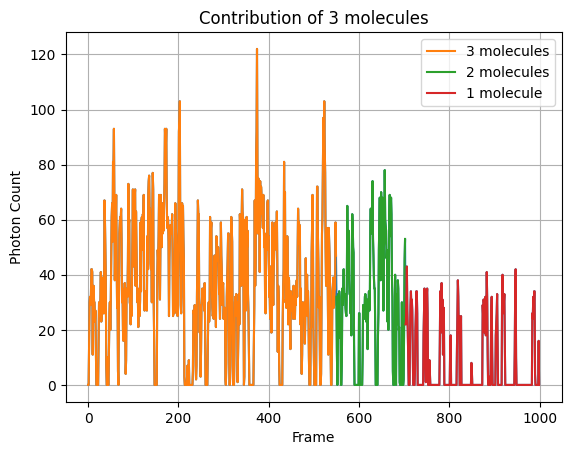

In [99]:
contributions =photons_ctmc1 + photons_ctmc2+photons_ctmc3
plateau1 = contributions[:-450]
plateau2 = contributions[-450:-297]
plateau3 = contributions[-297:]

plt.figure()
plt.plot(np.arange(len(photons_ctmc2)),contributions)
plt.plot(np.arange(len(plateau1)), plateau1, label="3 molecules")
plt.plot(np.arange(len(plateau1), len(plateau1)+len(plateau2)), plateau2, label="2 molecules")
plt.plot(np.arange(len(plateau1)+len(plateau2), len(plateau1)+len(plateau2)+len(plateau3)), plateau3, label="1 molecule")
plt.xlabel('Frame')
plt.ylabel('Photon Count')
plt.title('Contribution of 3 molecules')
plt.grid(True)
plt.legend()
plt.show()


original_model = study_variability([plateau1, plateau2, plateau3])

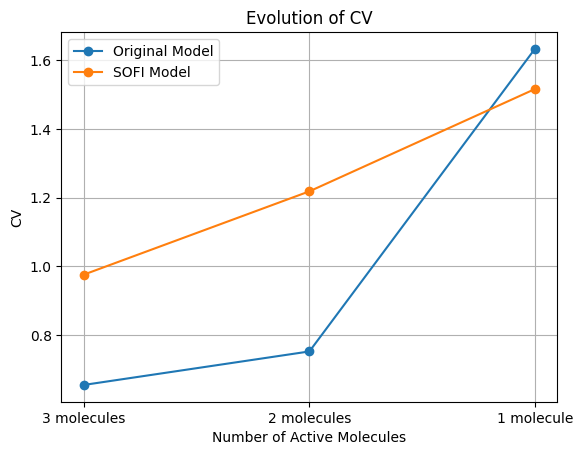

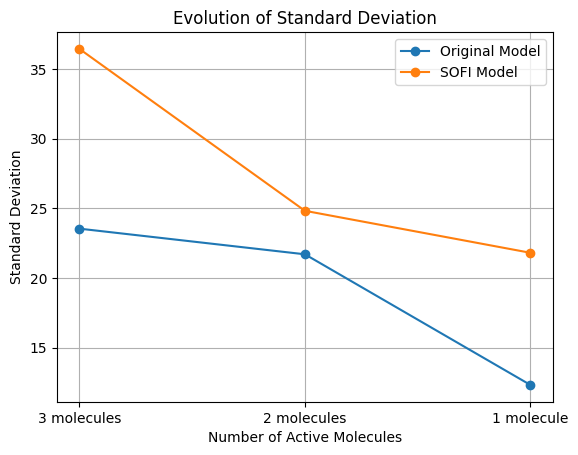

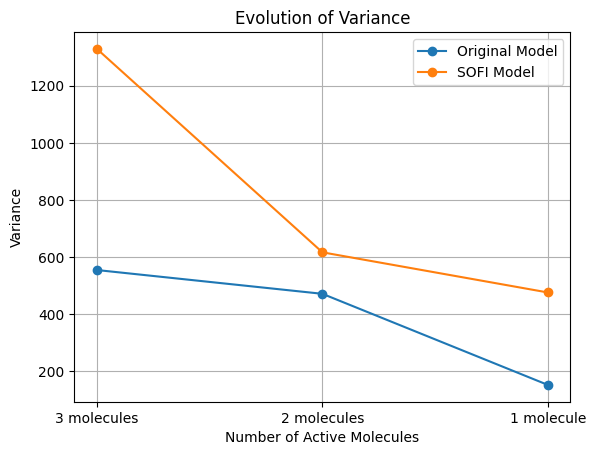

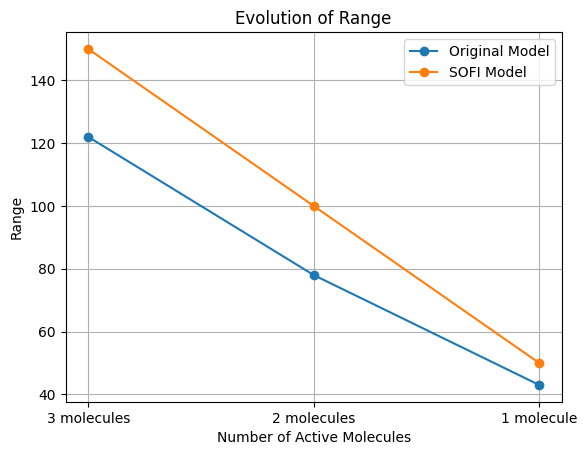

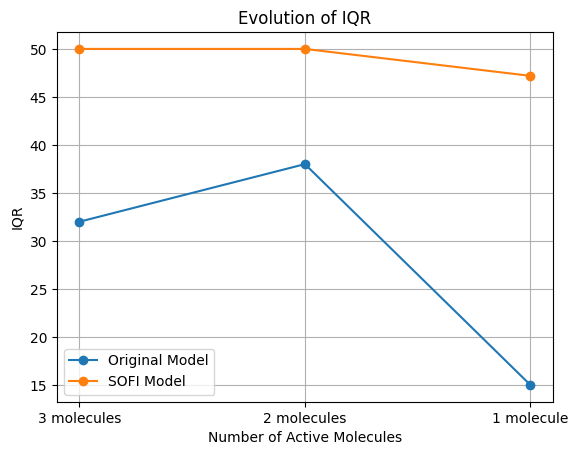

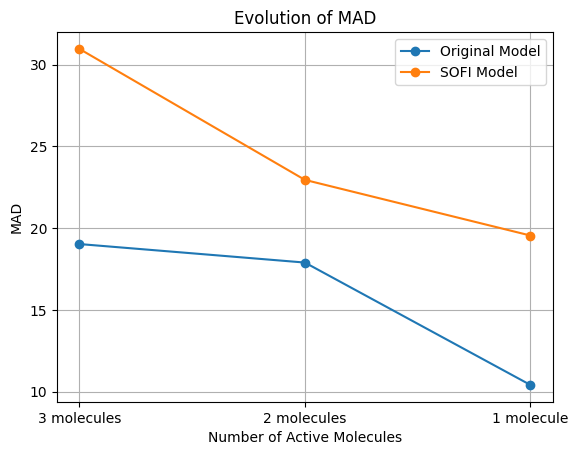

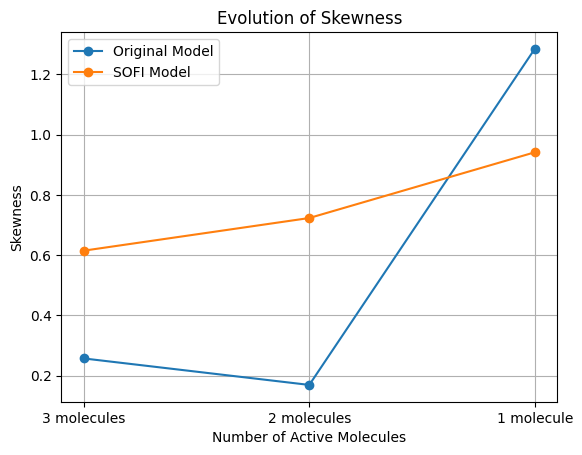

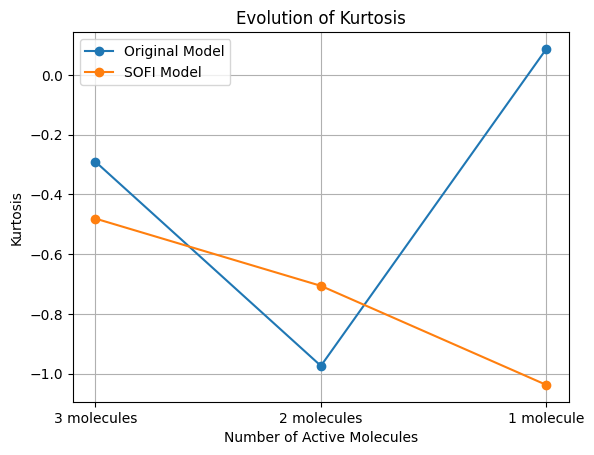

In [101]:
import matplotlib.pyplot as plt

# Define the labels and stages
stages = ['3 molecules', '2 molecules', '1 molecule']

# Define the list of metrics you want to compare
metrics = ['CV', 'Standard Deviation', 'Variance', 'Range', 'IQR', 'MAD', 'Skewness', 'Kurtosis']

# Plot the evolution for each metric
for metric in metrics:
    plt.figure()
    plt.plot(stages, original_model[metric], marker='o', label='Original Model')
    plt.plot(stages, sofi_model[metric], marker='o', label='SOFI Model')
    plt.xlabel('Number of Active Molecules')
    plt.ylabel(metric)
    plt.title(f'Evolution of {metric}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"/home/lenoco/Documents I3S/Redaction/Meetings Morpheme/Presentation Morpheme 12_09/CTMC vs SOFI/{metric}.png")
    plt.show()


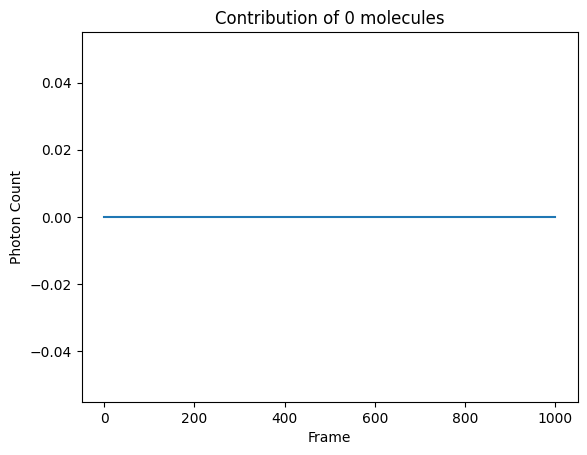

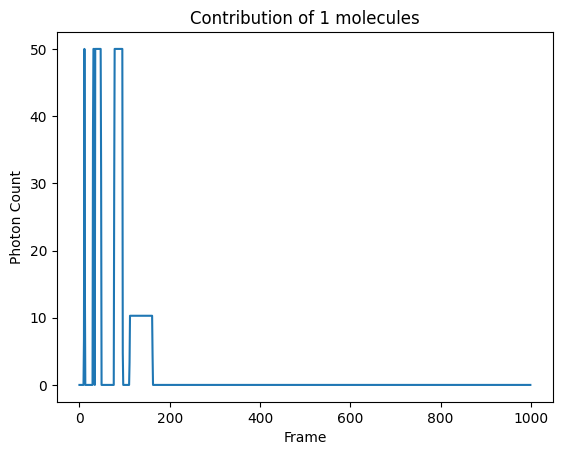

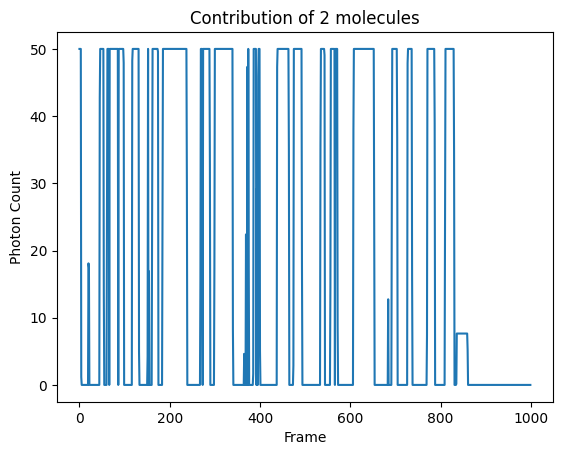

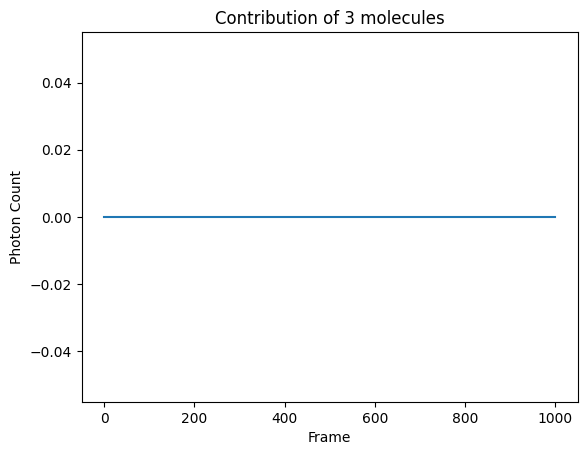

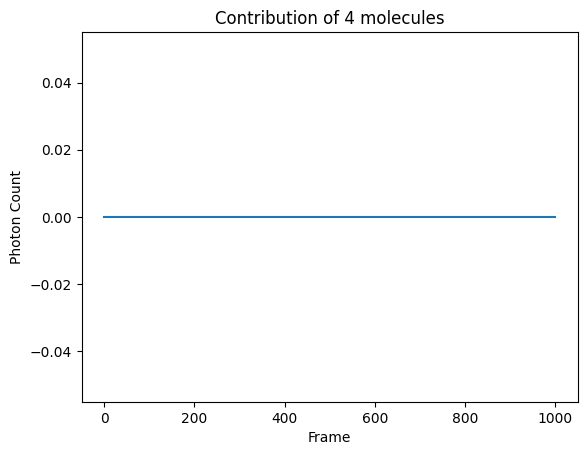

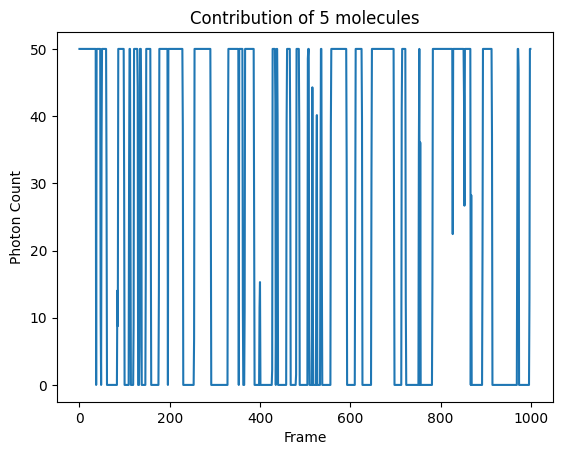

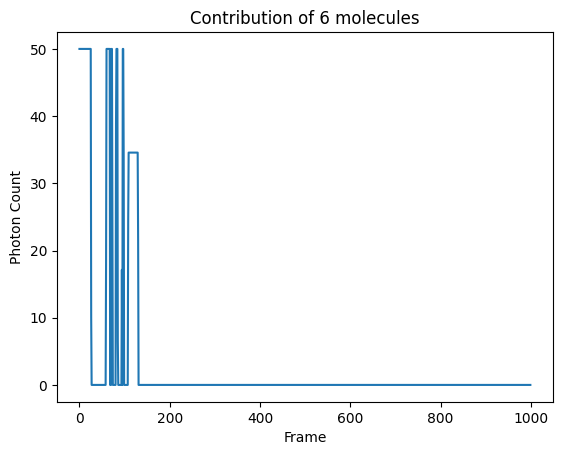

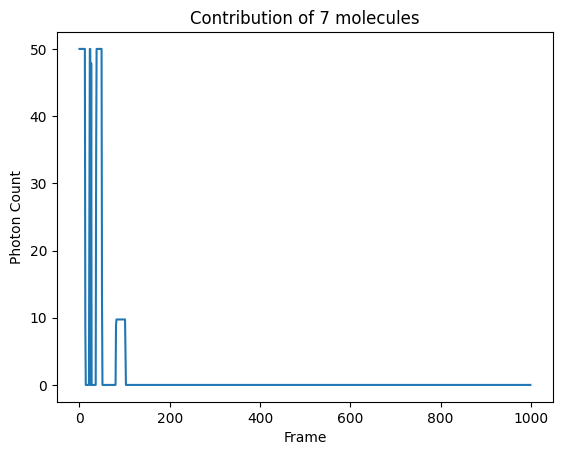

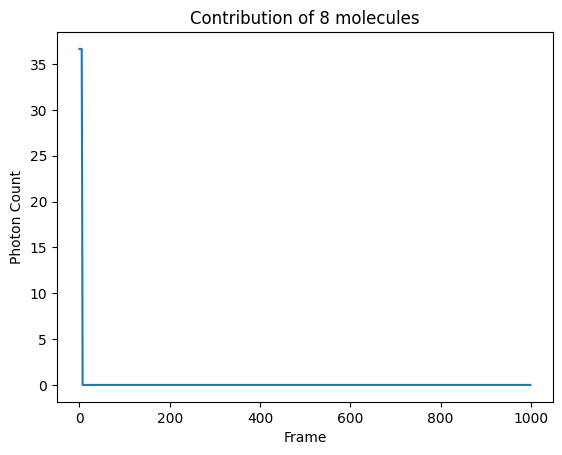

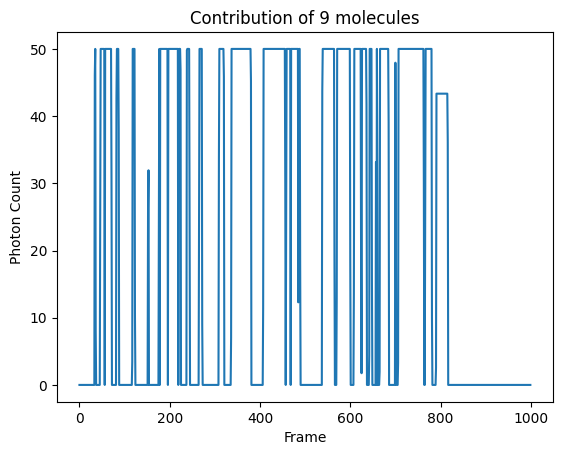

In [124]:
def find_bleaching_index(arr):
    for i in range(len(arr)):
        if arr[i] == 0 and np.all(arr[i:] == 0):
            return i
    return None  # Return None if no bleaching index is found
# Assume generate_trace is a predefined function
# Replace with your actual function definition if needed

Ion = np.max(photons_ctmc1)
Ton = 15
Toff = 15
Tbl = 200

for i in range(10):
    times, _, photons_sofi, state_vector = generate_trace(Ion, Ton, Toff, Tbl, experiment_setup["num_frames"], dynamics=True, seed=i)

    # # Clip photon values to the desired range
    photons_sofi[photons_sofi < 0] = 0
    photons_sofi[photons_sofi > Ion] = 0



    bleaching_frame = find_bleaching_index(photons_sofi)




    plt.figure()
    plt.plot(np.arange(len(photons_sofi)),photons_sofi)
    plt.xlabel('Frame')
    plt.ylabel('Photon Count')
    plt.title(f'Contribution of {i} molecules')
    ax2.grid(True)
    plt.show()

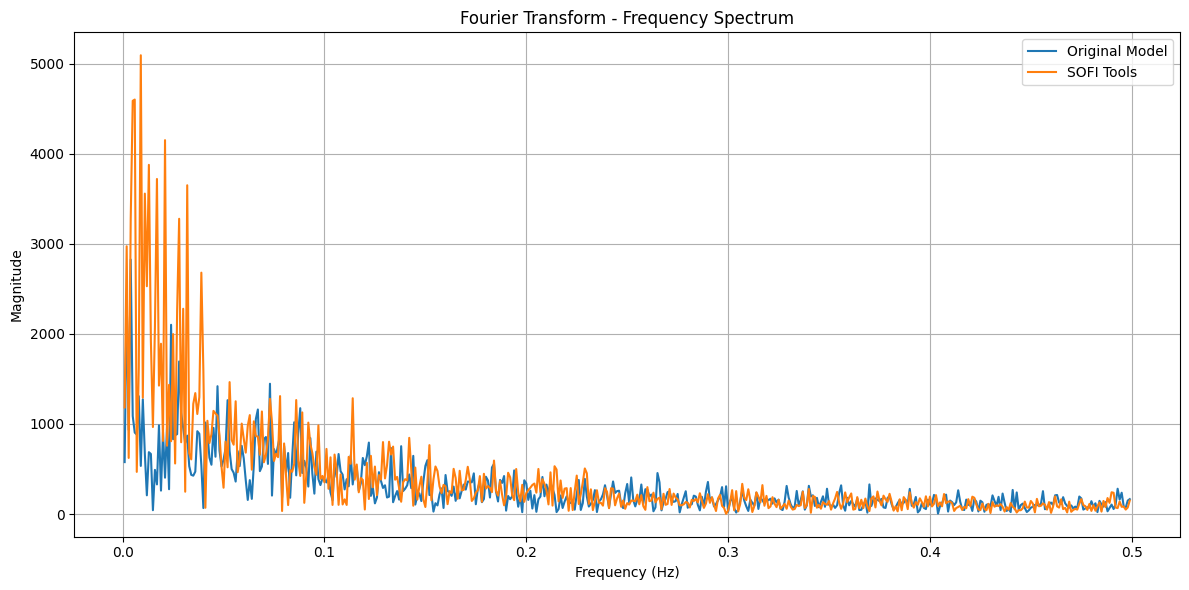

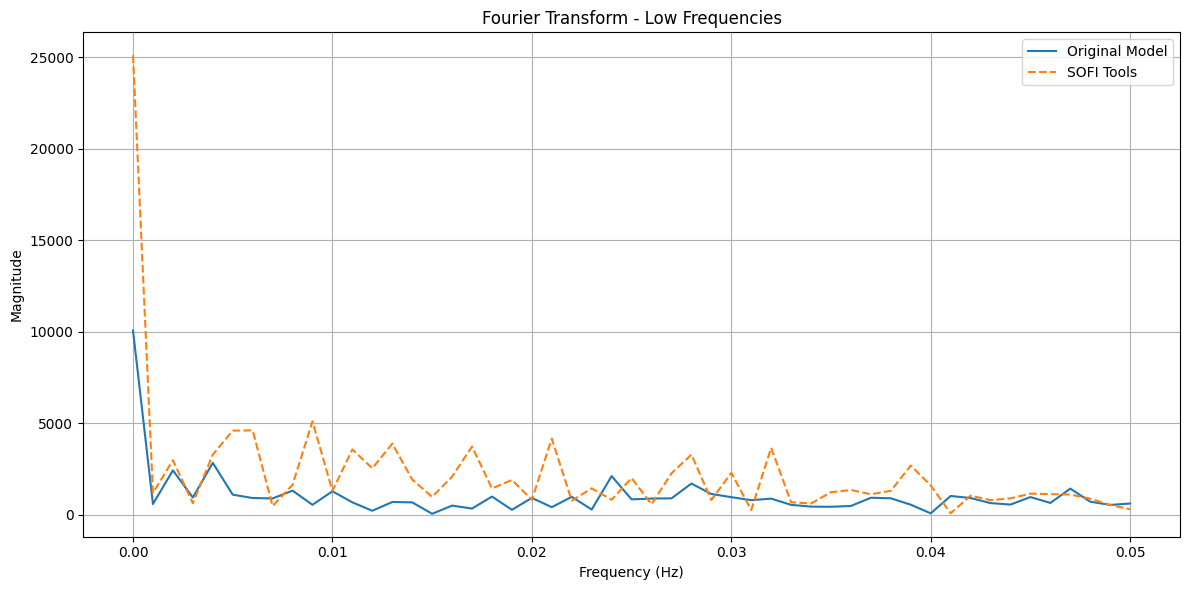

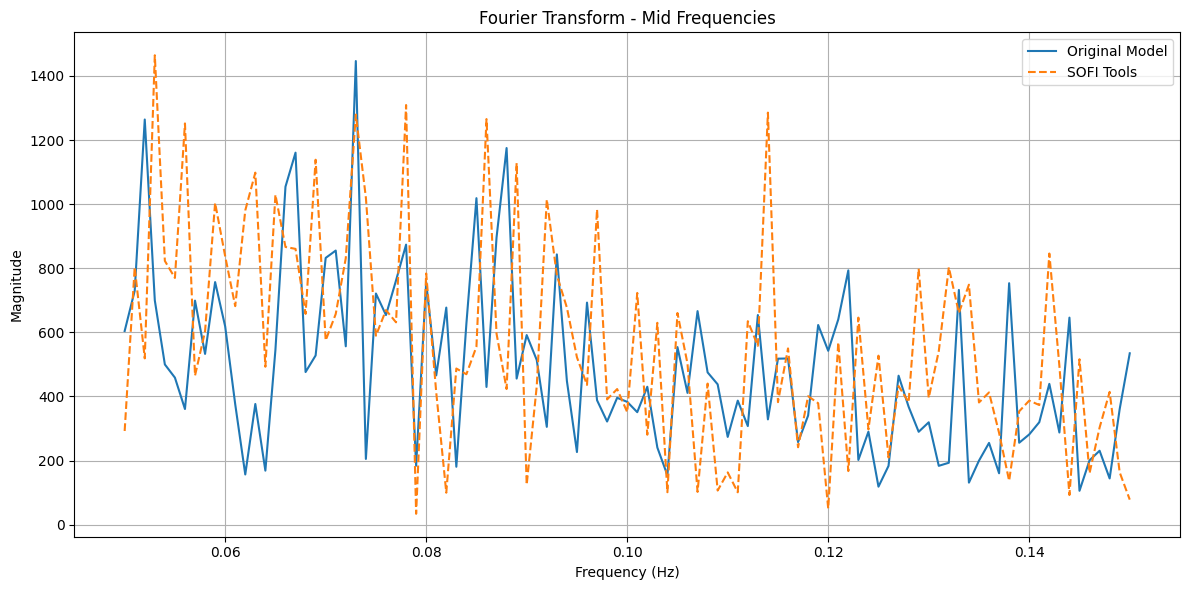

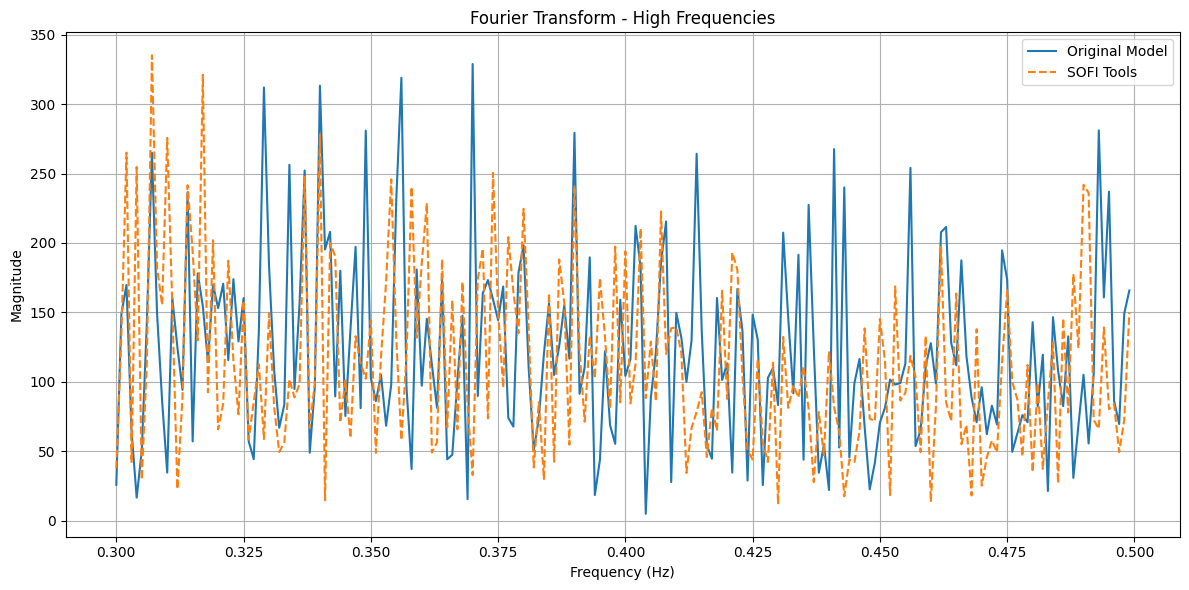

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Assuming `photon_series_original` and `photon_series_sofi` are the time series arrays 
# from the original model and the SOFI model, respectively.

def fourier_analysis(photon_series, sampling_rate=1.0):
    # Number of samples in the time series
    N = len(photon_series)
    
    # Compute the Fourier Transform
    yf = fft(photon_series)
    xf = fftfreq(N, d=sampling_rate)[:N//2]  # Frequency components
    
    return xf, np.abs(yf[:N//2])


Ion = np.max(photons_ctmc1)
Ton = 15
Toff = 15
Tbl = 200


# Perform Fourier analysis on both models
xf_original, yf_original = fourier_analysis(photons_ctmc1)
times, _, photons_sofi, state_vector = generate_trace(Ion, Ton, Toff, Tbl, experiment_setup["num_frames"], dynamics=True, seed=5)

xf_sofi, yf_sofi = fourier_analysis(photons_sofi)

# Plot the Fourier Transform Magnitude
plt.figure(figsize=(12, 6))

plt.plot(xf_original[1:], yf_original[1:], label='Original Model')
plt.plot(xf_sofi[1:], yf_sofi[1:], label='SOFI Tools')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform - Frequency Spectrum')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/home/lenoco/Documents I3S/Redaction/Meetings Morpheme/Presentation Morpheme 12_09/CTMC vs SOFI/Fourier.png")
plt.show()

# Define frequency ranges for low, mid, and high frequencies
low_freq_range = (0, 0.05)
mid_freq_range = (0.05, 0.15)
high_freq_range = (0.3, 0.5)

# Function to plot zoomed-in frequency ranges
def plot_zoomed_frequency_range(xf, yf, xf_sofi, yf_sofi, range_min, range_max, title):
    plt.figure(figsize=(12, 6))

    # Filter data within the frequency range
    mask = (xf >= range_min) & (xf <= range_max)
    mask_sofi = (xf_sofi >= range_min) & (xf_sofi <= range_max)

    # Plot Fourier Transform Magnitude
    plt.plot(xf[mask], yf[mask], label='Original Model')
    plt.plot(xf_sofi[mask_sofi], yf_sofi[mask_sofi], label='SOFI Tools', linestyle='--')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(f'Fourier Transform - {title}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"/home/lenoco/Documents I3S/Redaction/Meetings Morpheme/Presentation Morpheme 12_09/CTMC vs SOFI/Fourier{title}.png")
    plt.tight_layout()
    plt.show()

# Plot for Low Frequency Range
plot_zoomed_frequency_range(xf_original, yf_original, xf_sofi, yf_sofi, *low_freq_range, 'Low Frequencies')

# Plot for Mid Frequency Range
plot_zoomed_frequency_range(xf_original, yf_original, xf_sofi, yf_sofi, *mid_freq_range, 'Mid Frequencies')

# Plot for High Frequency Range
plot_zoomed_frequency_range(xf_original, yf_original, xf_sofi, yf_sofi, *high_freq_range, 'High Frequencies')


# PALM

In [2]:
# Experiment setup dictionary
experiment_setup = {
    "protocol": "PALM",
    "experiment_duration": None,  # s
    "num_frames": 3500,            # frames
    "frame_length": 1e-2,         # s
    "excitation_P": 1e5,          # W/cm^2
    "activation_P": {"P":5,
                     "beta":1e-2},         # W/cm^2
    "excitation_wavelength": 647  # nm
}

# Molecule parameters dictionary
molecule = {
    "epsilon": 239000,                          # Extinction coefficient M^-1 cm^-1
    "excitation_lifetime": 1e-9,                # Excited state lifetime, s (1 ns)
    "num_cycles_before_bleaching": 150,         # Number of cycles before bleaching
    "alpha_nr": 1e-8,                           # propotional to Quantum yield
    "d_E": 0.5,                                 # Energy difference (eV), typically 0.5 - 1.5 eV
    "alpha_isc": 1e7                           # Intersystem crossing rate, between 1e-4 and 1e-2
}

if experiment_setup["experiment_duration"] is None:
    experiment_setup["experiment_duration"] = experiment_setup["num_frames"] * experiment_setup["frame_length"]


In [3]:
Q,i=rate_matrix(
        protocol=experiment_setup["protocol"], 
        epsilon=molecule["epsilon"], 
        excitation_lifetime=molecule["excitation_lifetime"], 
        excitation_wavelength=experiment_setup["excitation_wavelength"], 
        N_c=molecule["num_cycles_before_bleaching"], 
        excitation_P=experiment_setup["excitation_P"], 
        alpha_nr=molecule["alpha_nr"], 
        d_E=molecule["d_E"], 
        activation_P=experiment_setup["activation_P"], 
        alpha_isc=molecule["alpha_isc"]
    )


Q,i

(array([[-5.00000000e-02,  5.00000000e-02,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00, -2.97443466e+08,  2.97443466e+08,
          0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+09, -1.00666667e+09,
          6.66666667e+06],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]]),
 0)

In [54]:

def simulate_protocol(experiment_setup, molecule,seed=None):
    

    Q, initial_state = rate_matrix(
        protocol=experiment_setup["protocol"], 
        epsilon=molecule["epsilon"], 
        excitation_lifetime=molecule["excitation_lifetime"], 
        excitation_wavelength=experiment_setup["excitation_wavelength"], 
        N_c=molecule["num_cycles_before_bleaching"], 
        excitation_P=experiment_setup["excitation_P"], 
        alpha_nr=molecule["alpha_nr"], 
        d_E=molecule["d_E"], 
        activation_P=experiment_setup["activation_P"], 
        alpha_isc=molecule["alpha_isc"]
    )

    times, dynamics = simulate_ctmc_one_molecule(Q, 
                               initial_state, 
                               experiment_setup['experiment_duration'],
                               protocol = experiment_setup["protocol"], 
                               seed=seed)
    
    photons = count_photon_cycles_in_frames(times,dynamics,experiment_setup["frame_length"], experiment_setup["num_frames"], photon_emitting_state=1, ground_state=0)

    return times, dynamics,Q,photons

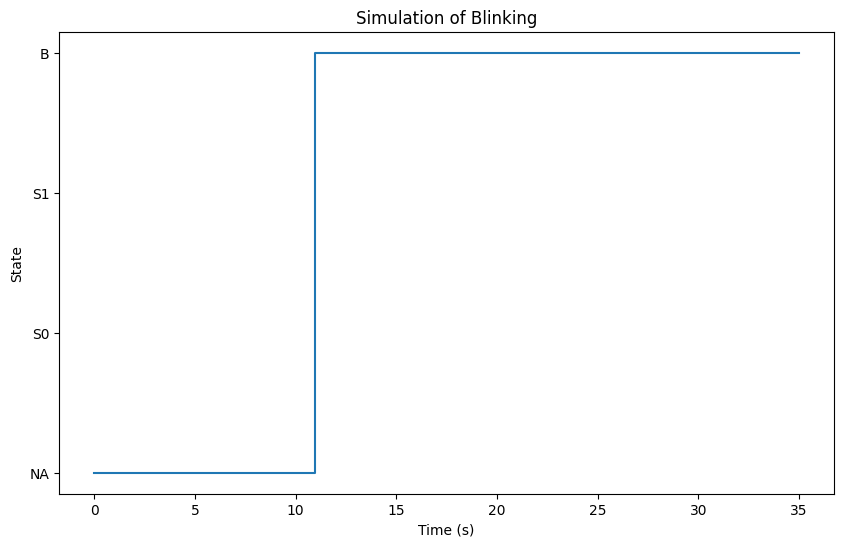

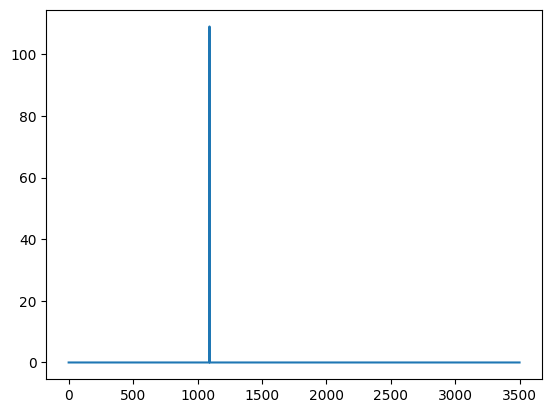

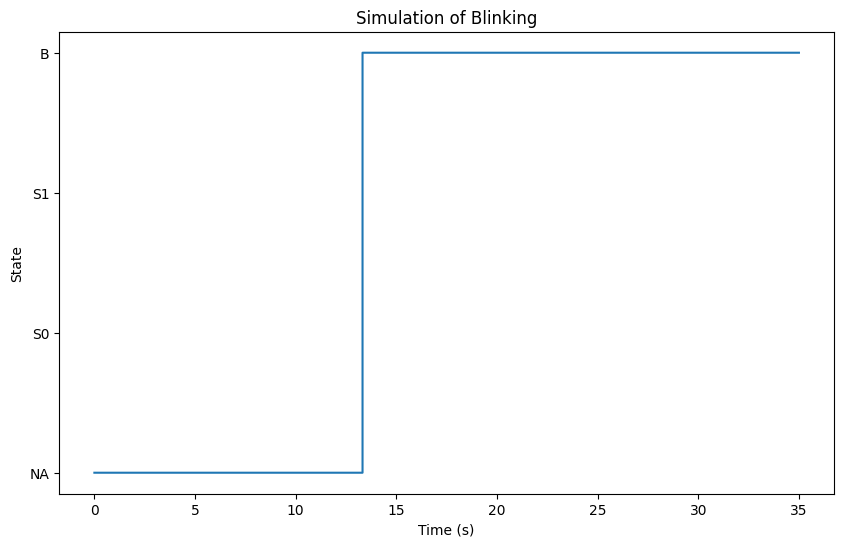

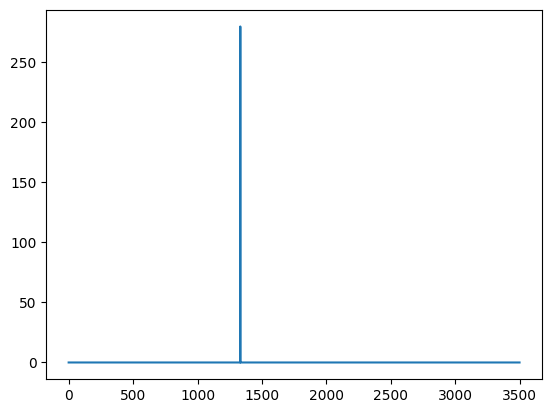

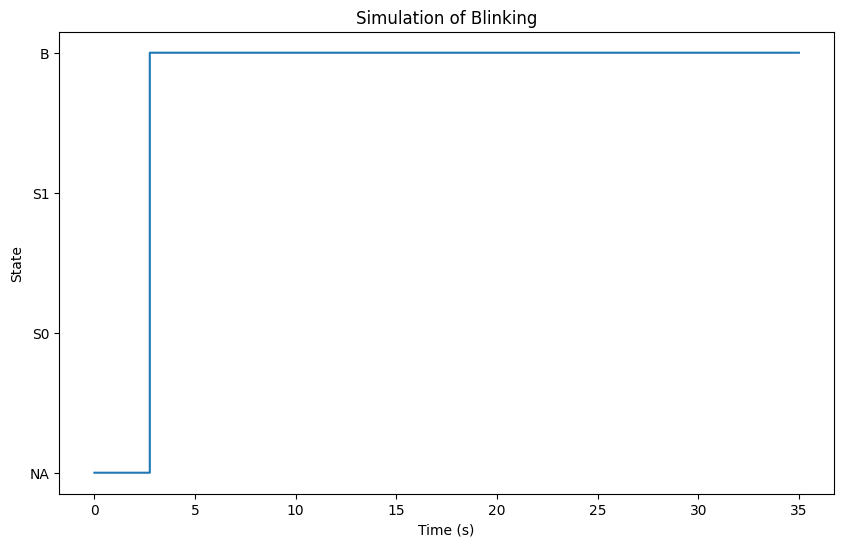

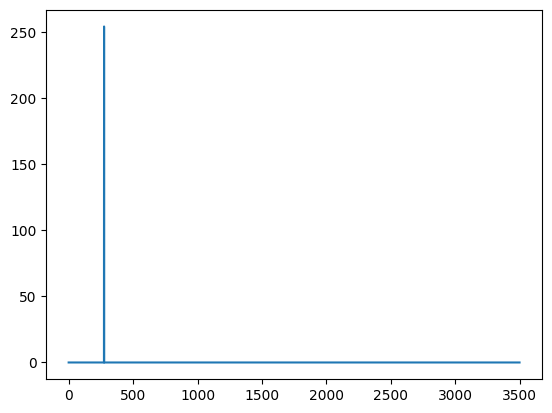

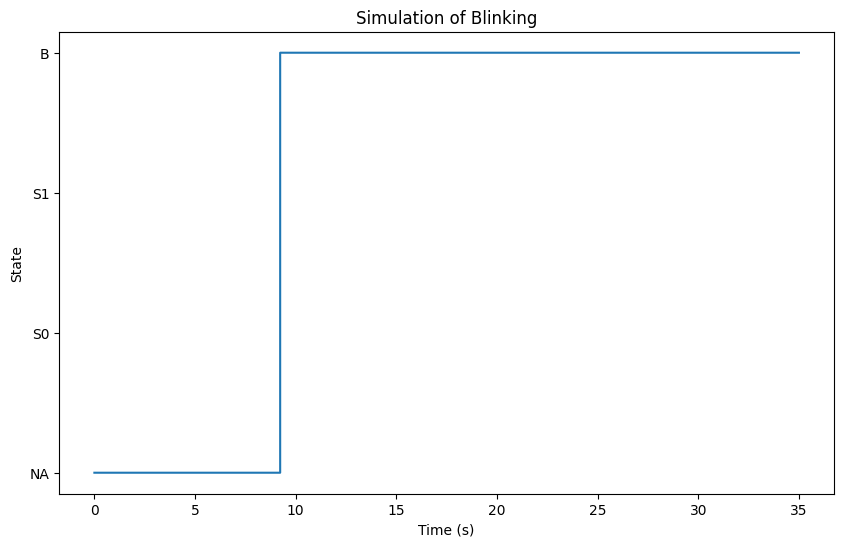

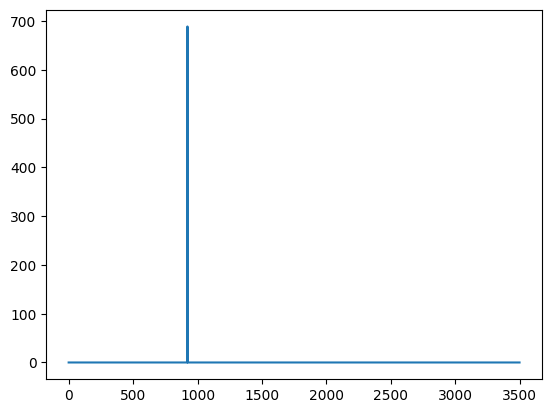

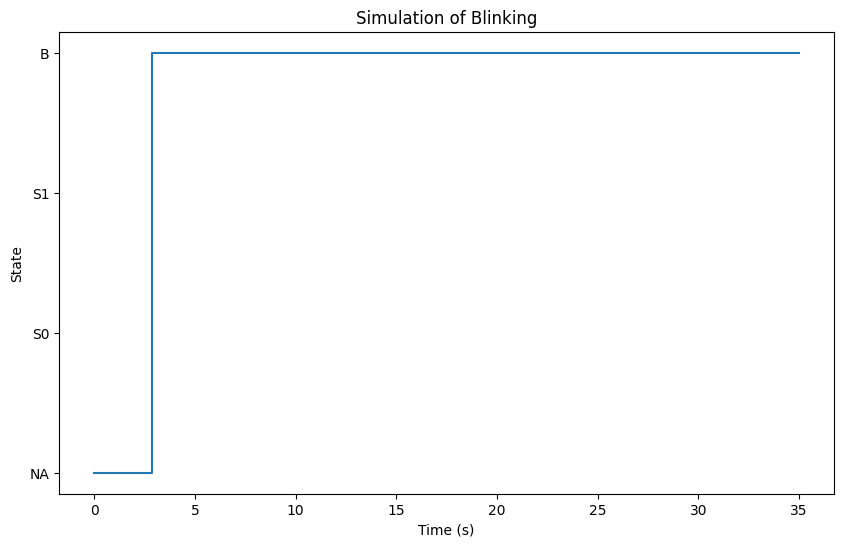

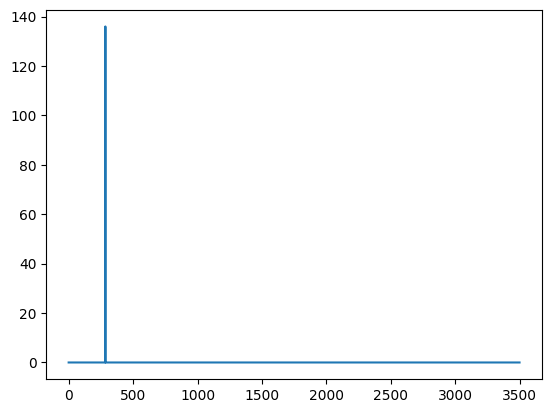

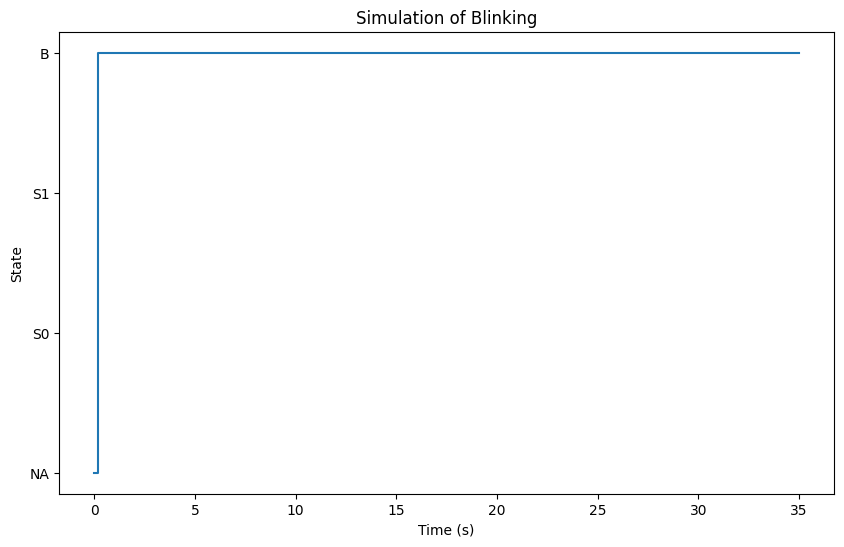

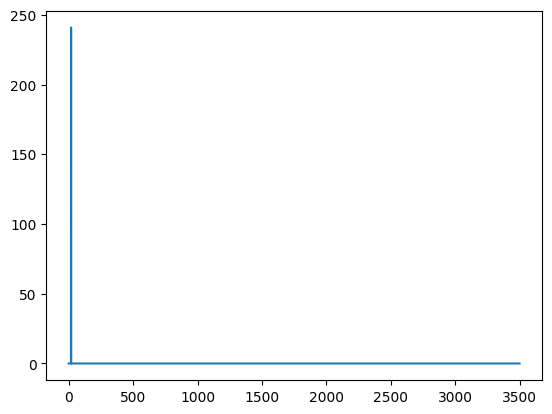

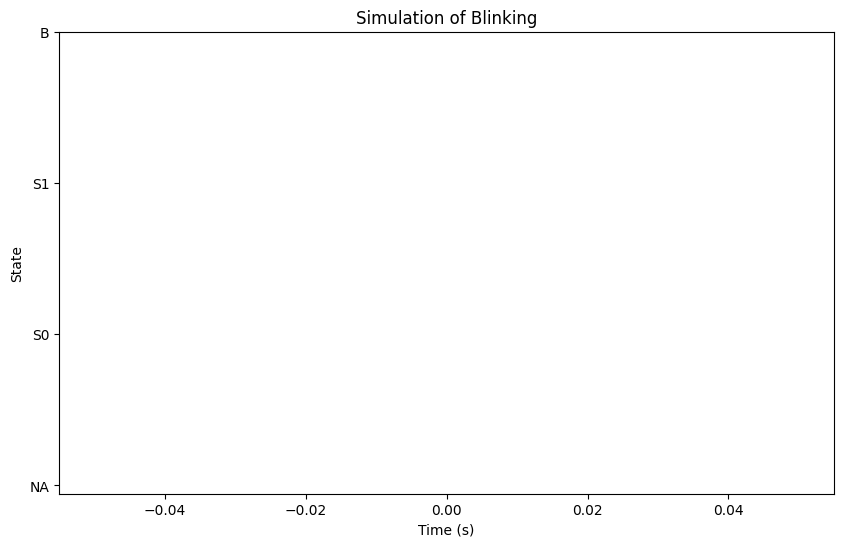

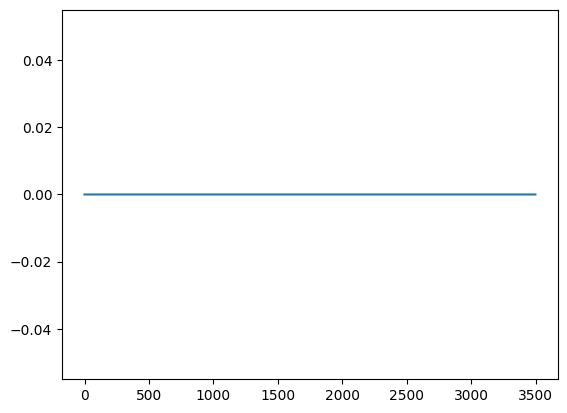

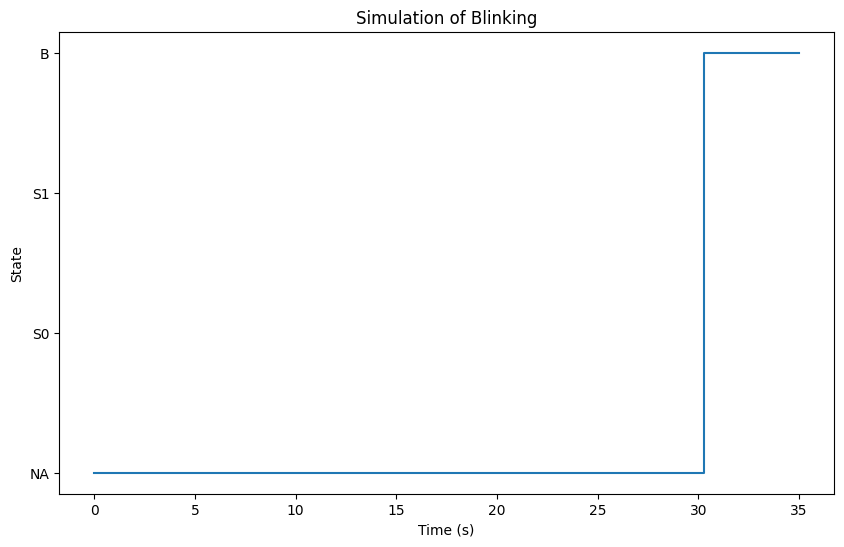

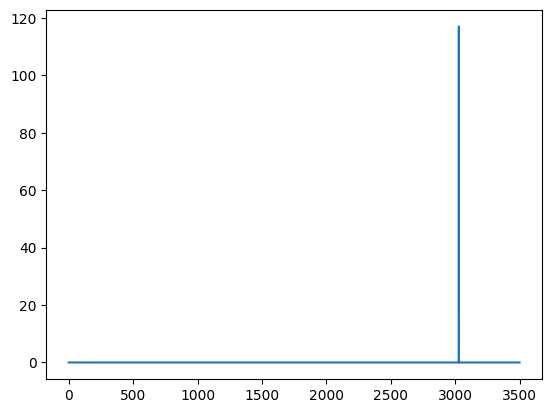

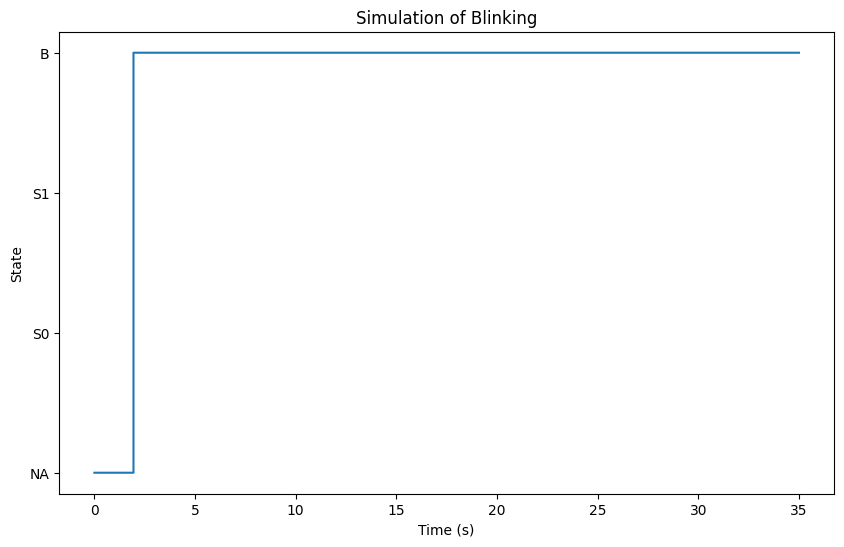

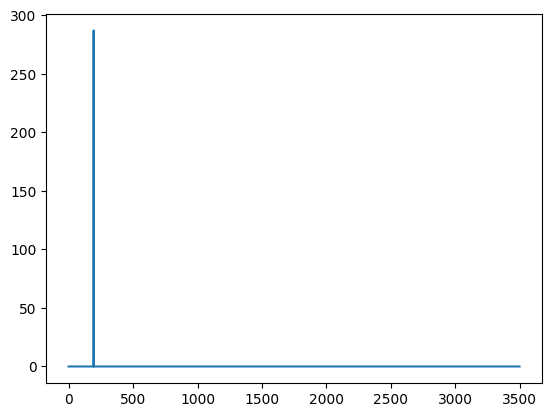

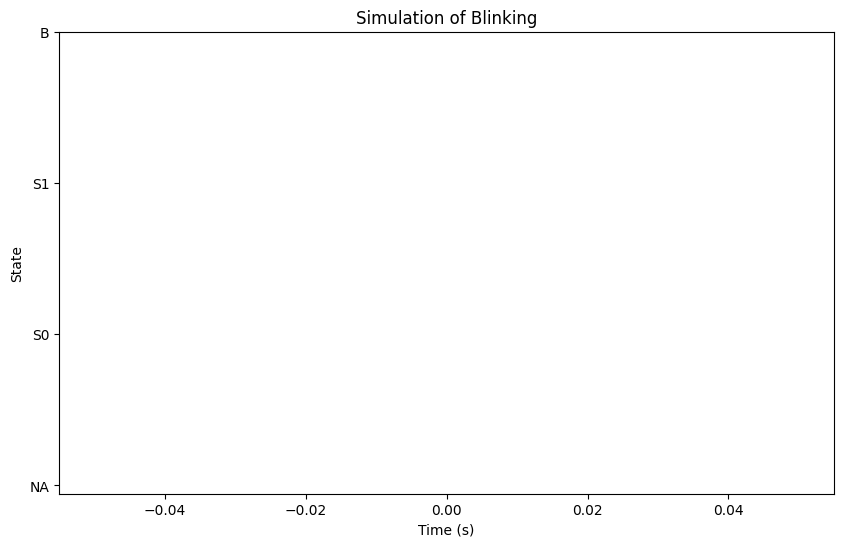

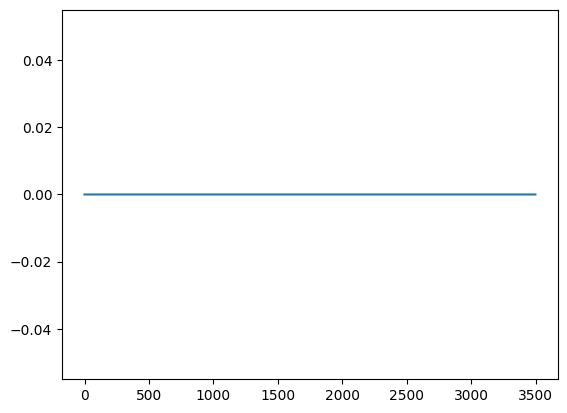

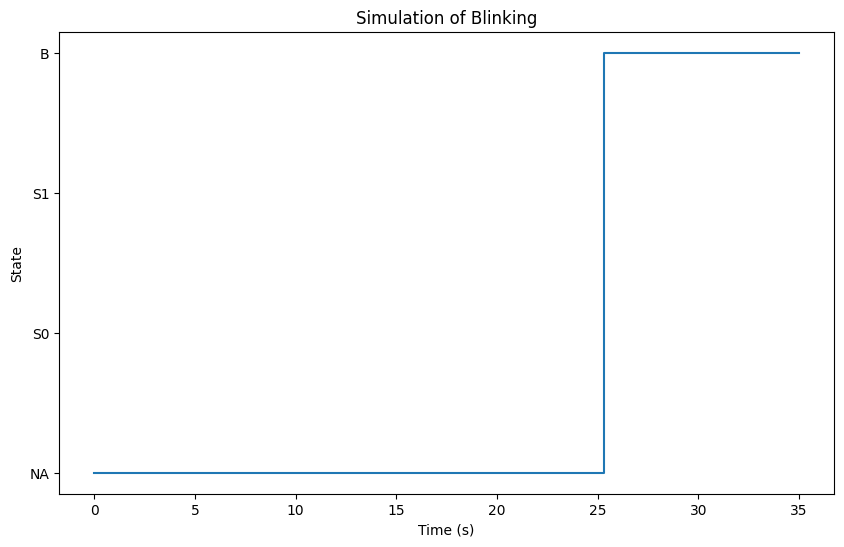

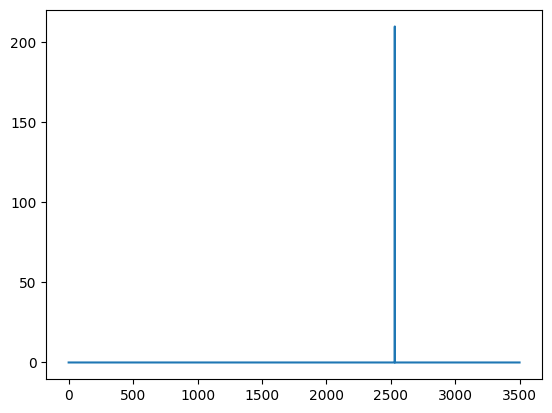

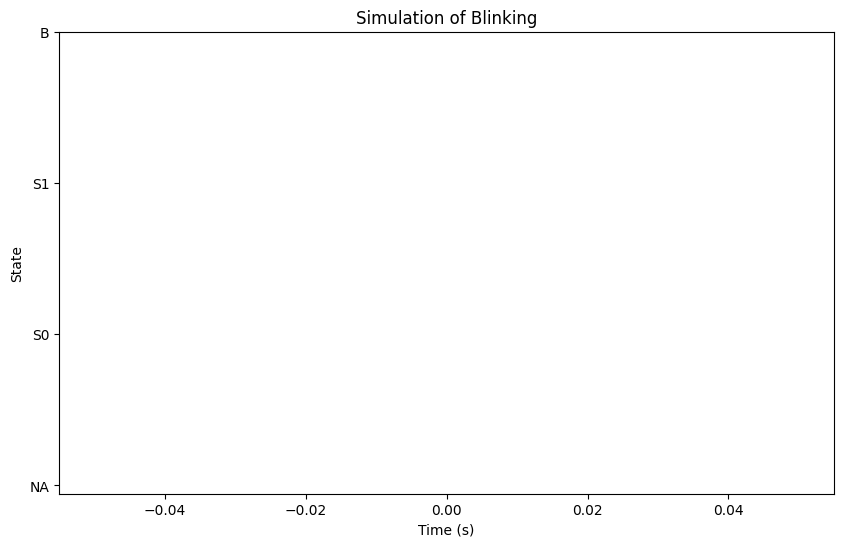

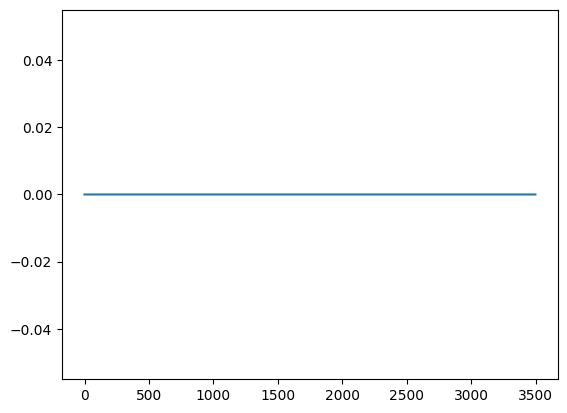

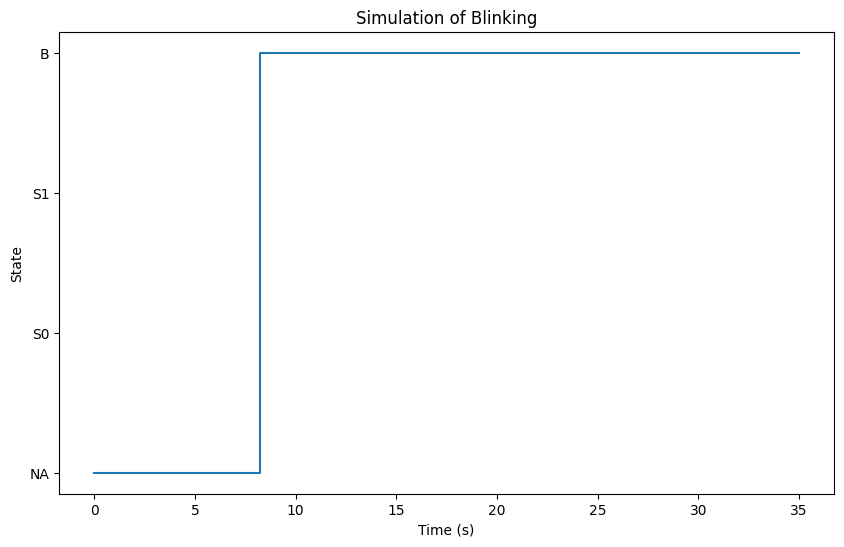

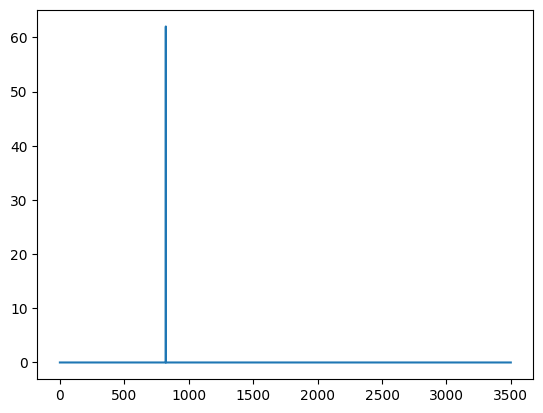

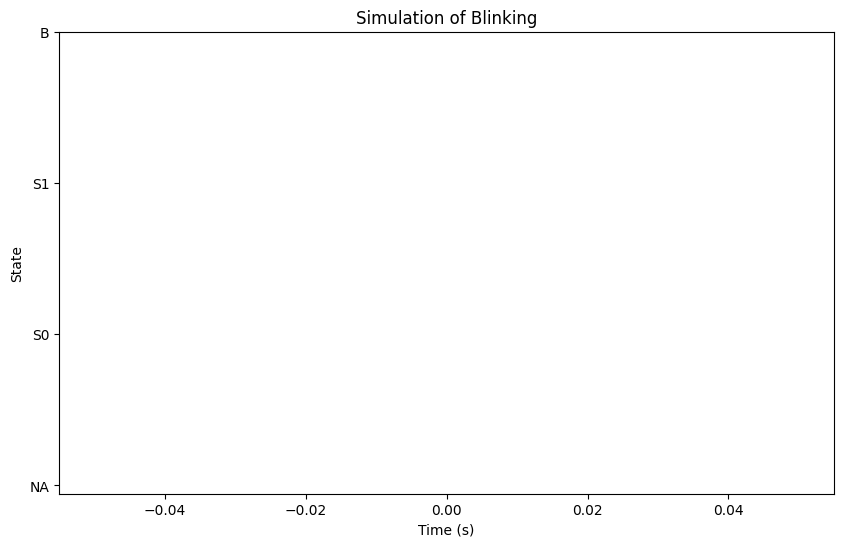

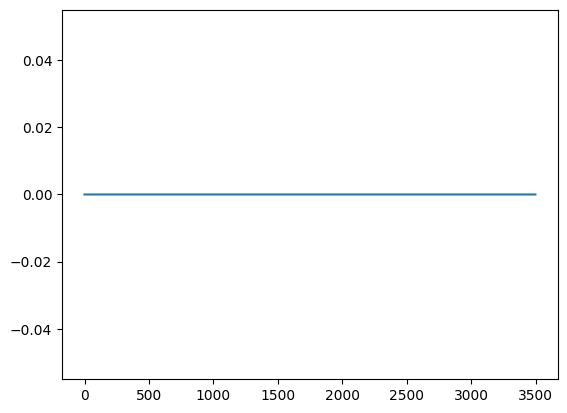

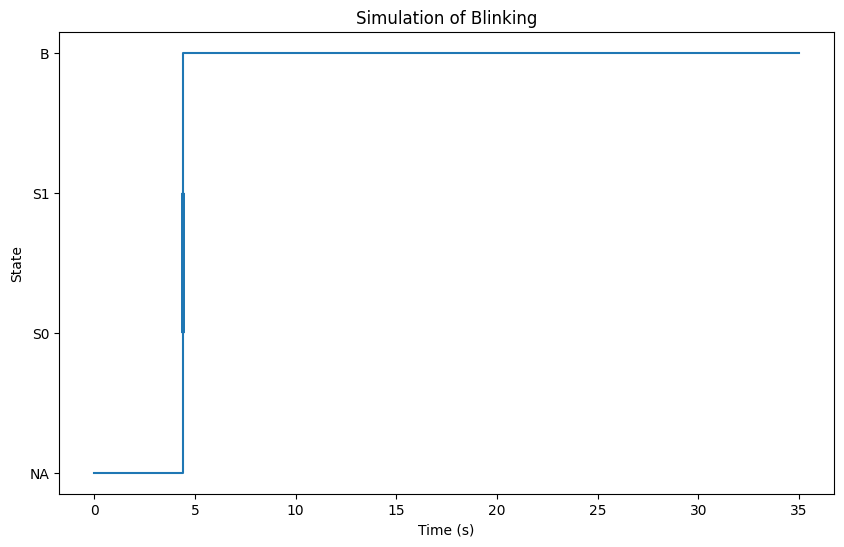

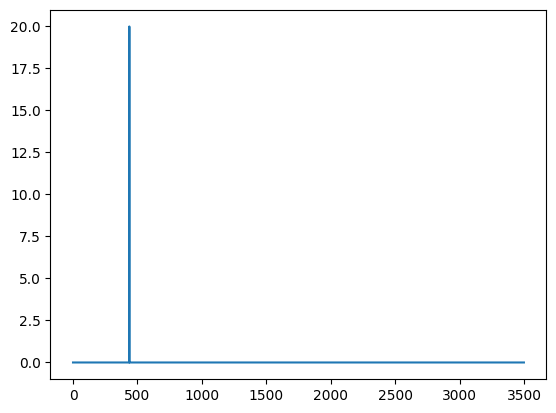

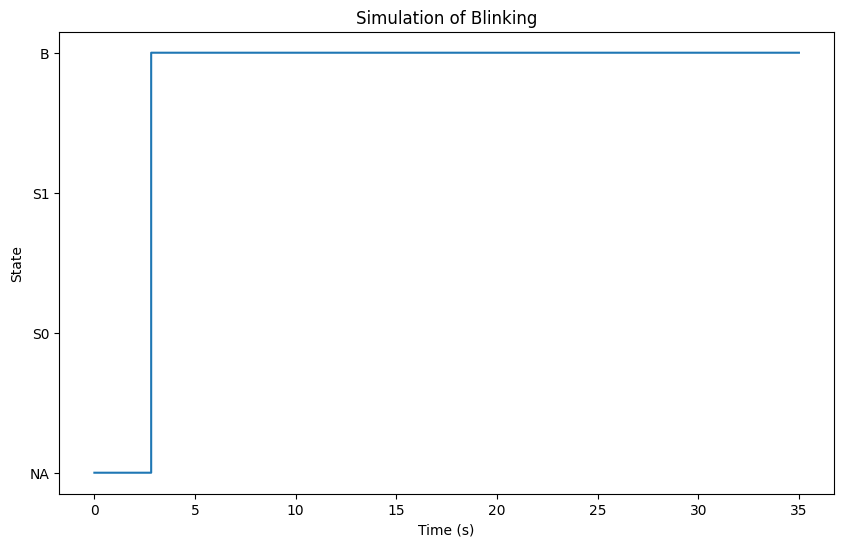

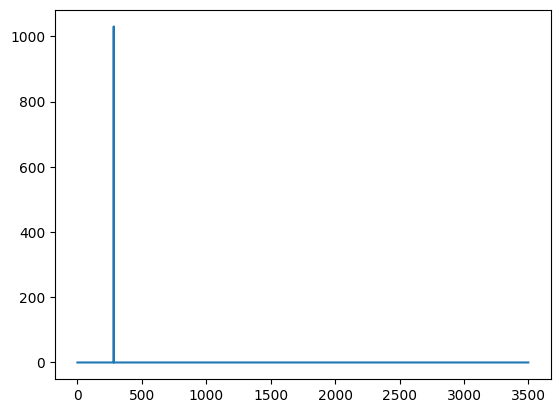

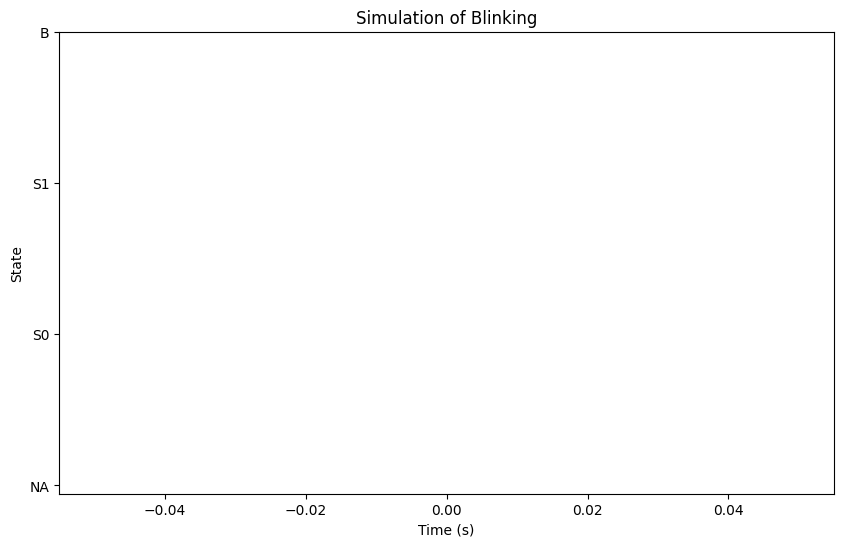

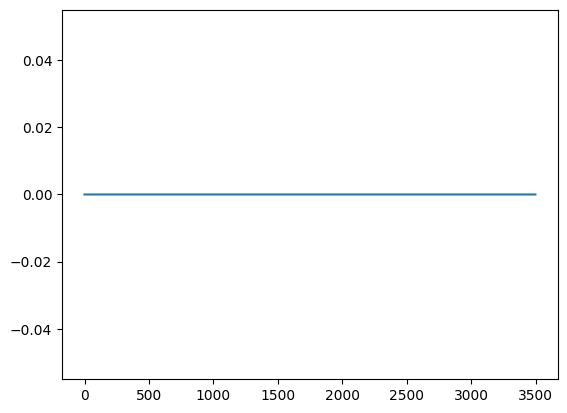

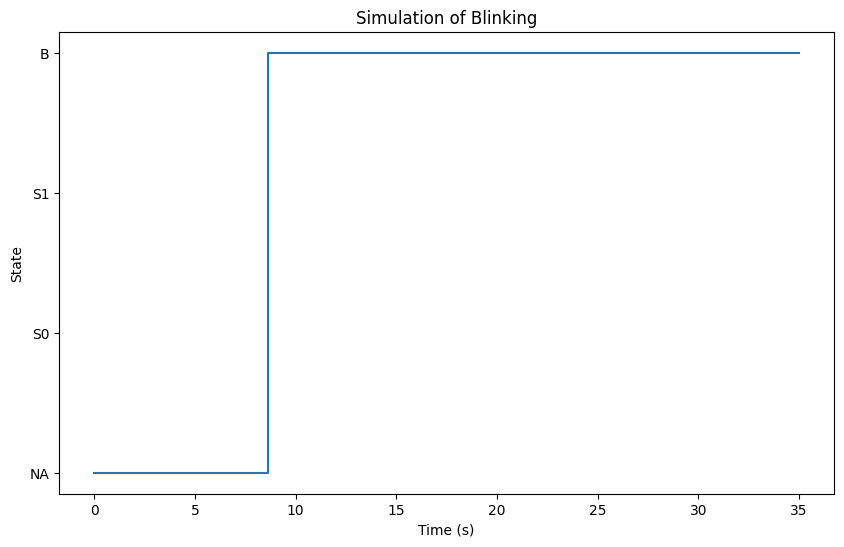

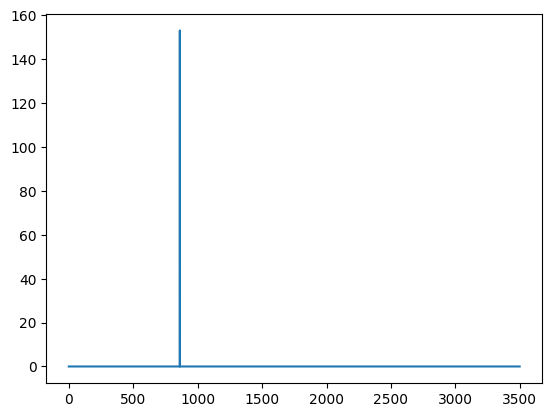

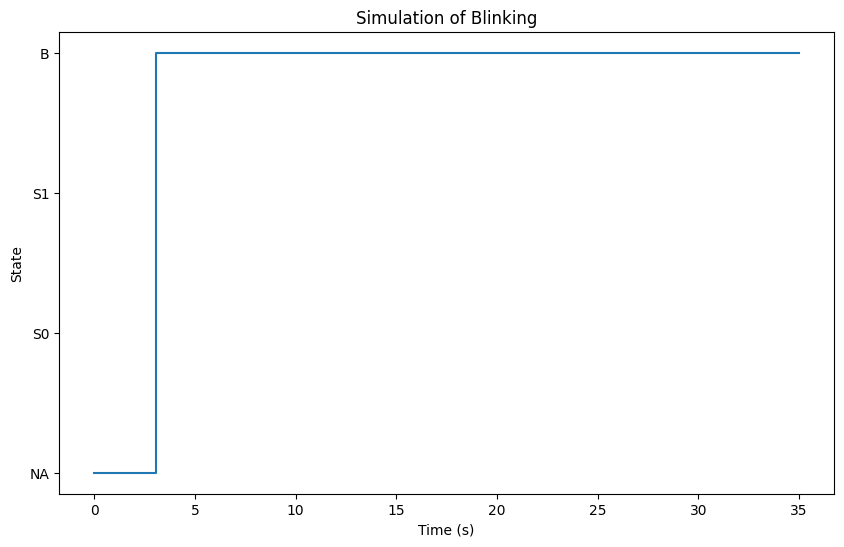

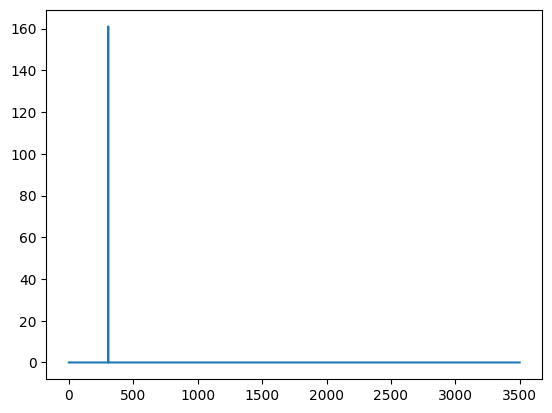

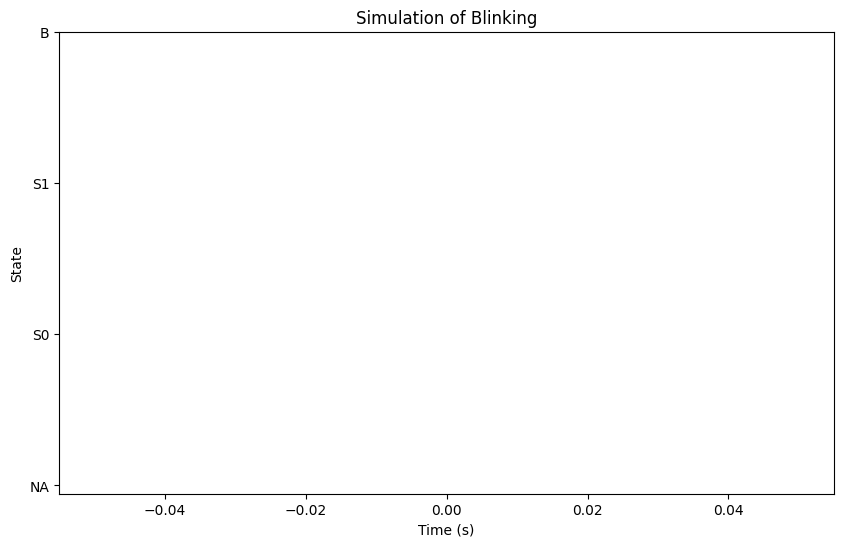

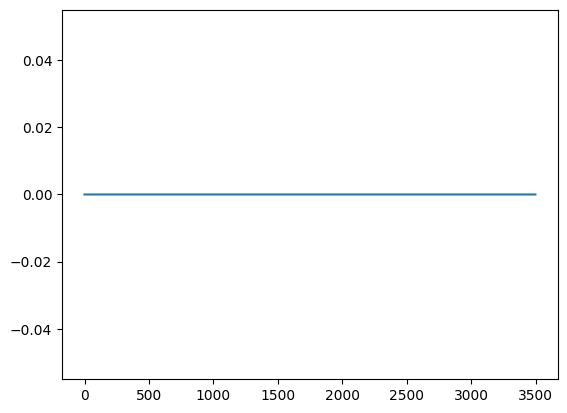

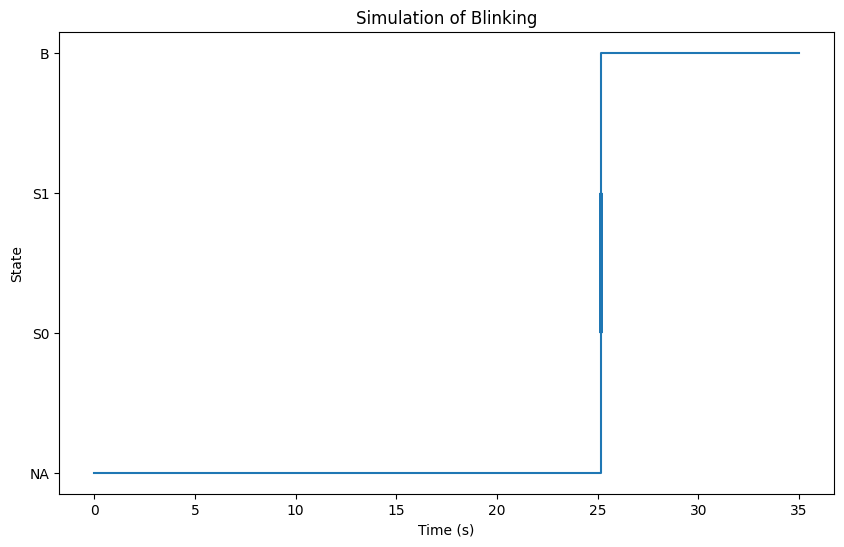

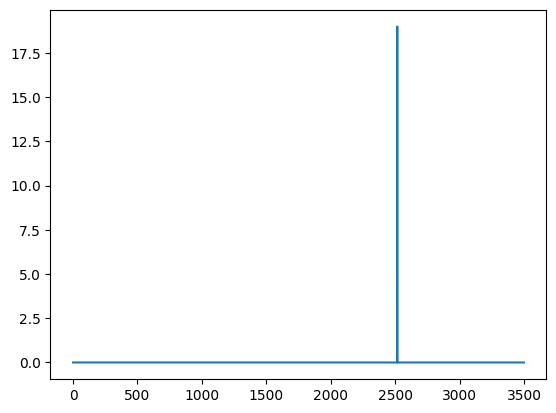

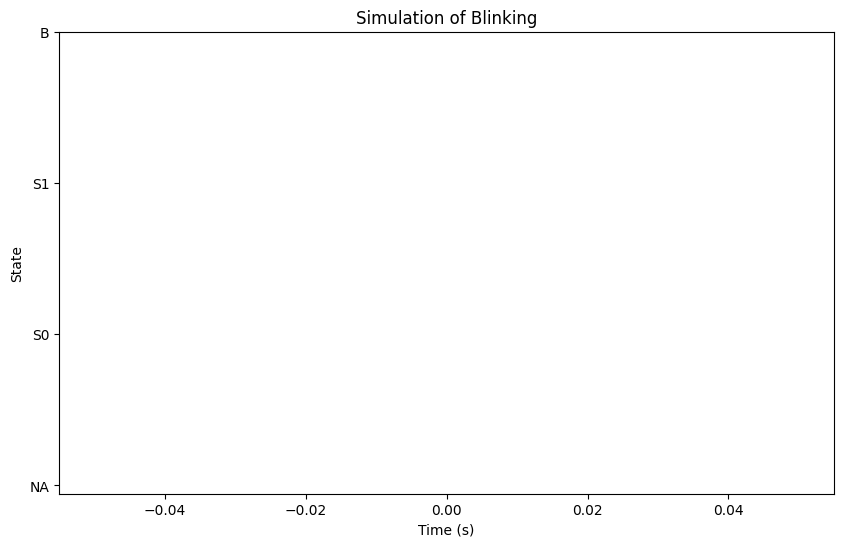

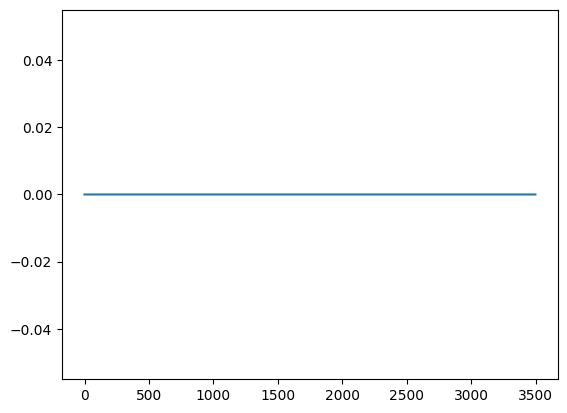

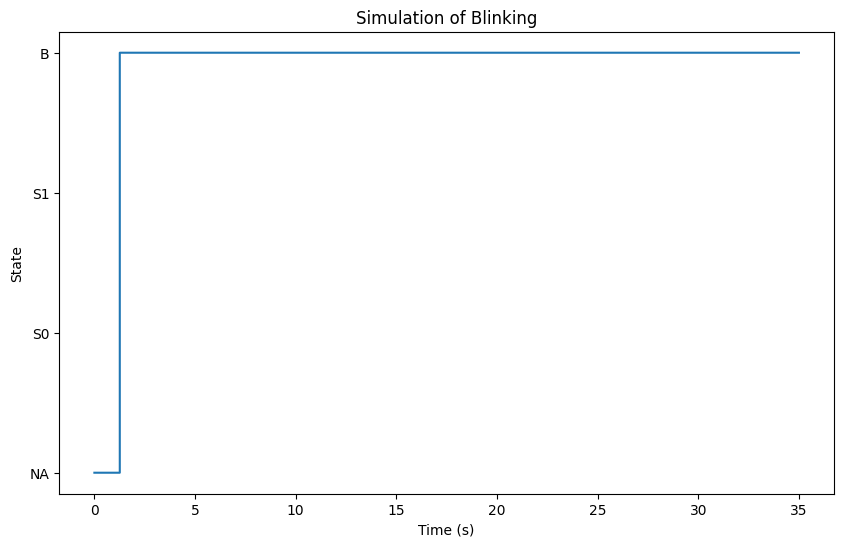

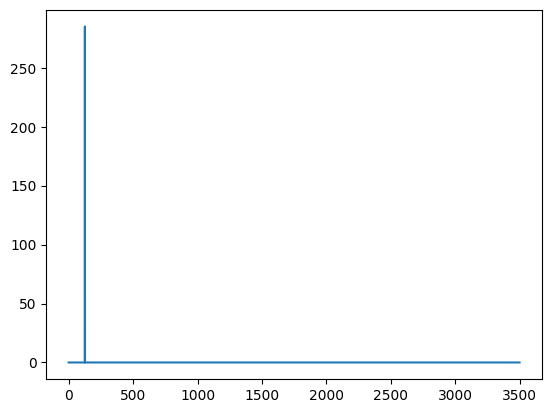

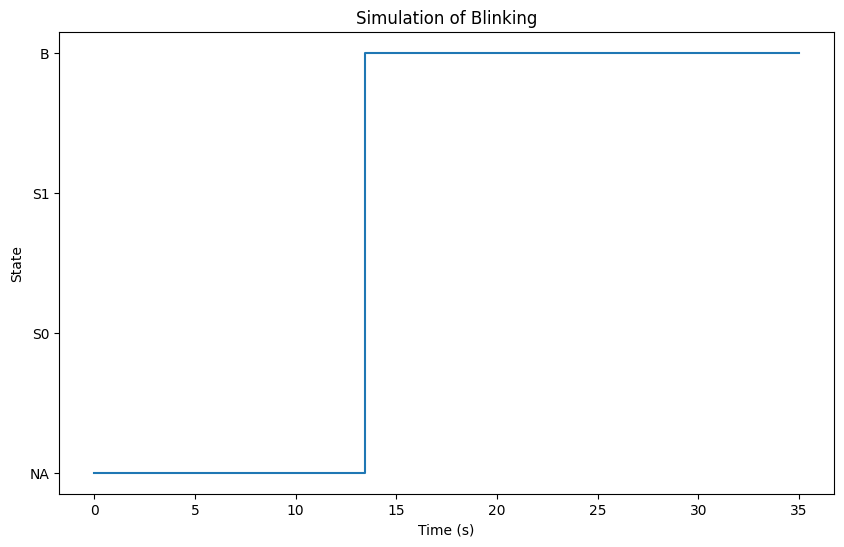

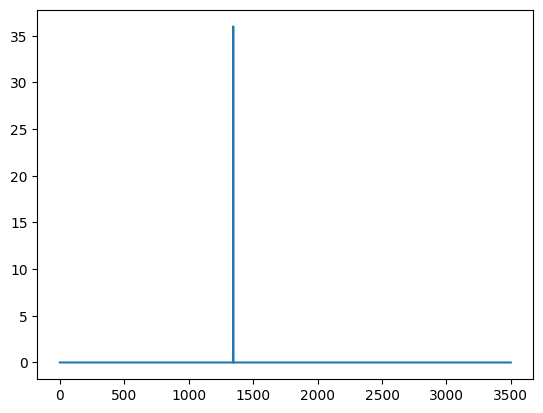

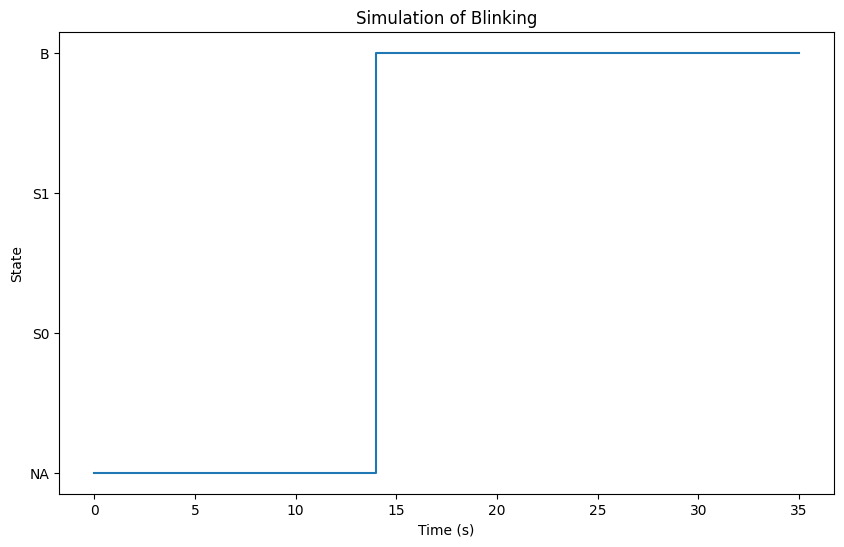

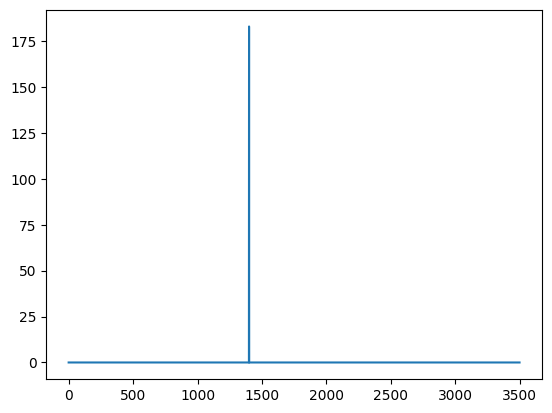

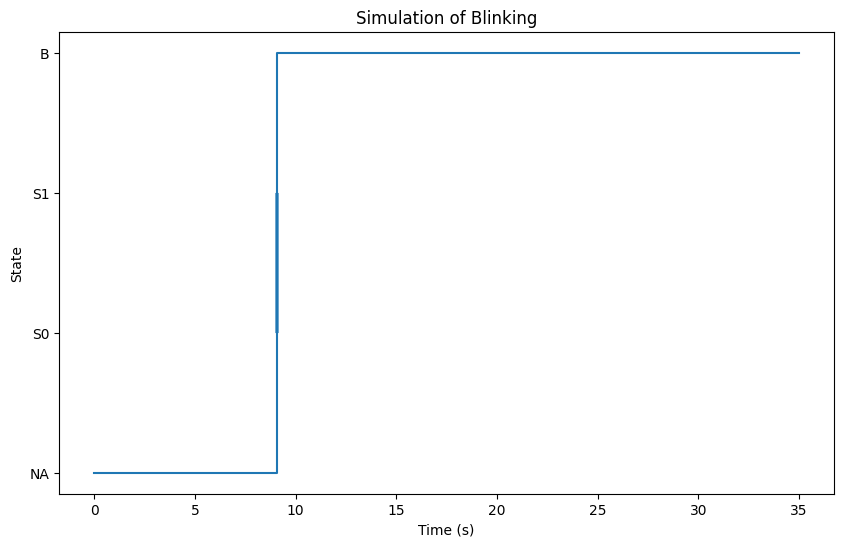

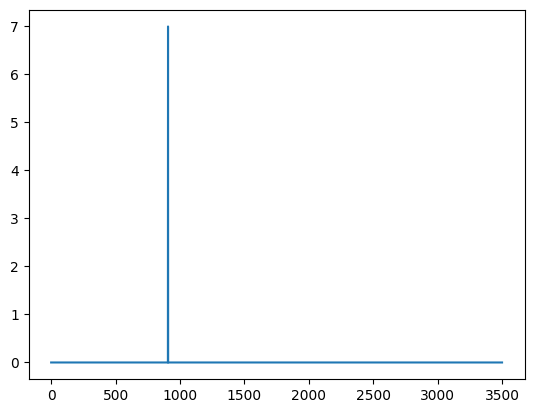

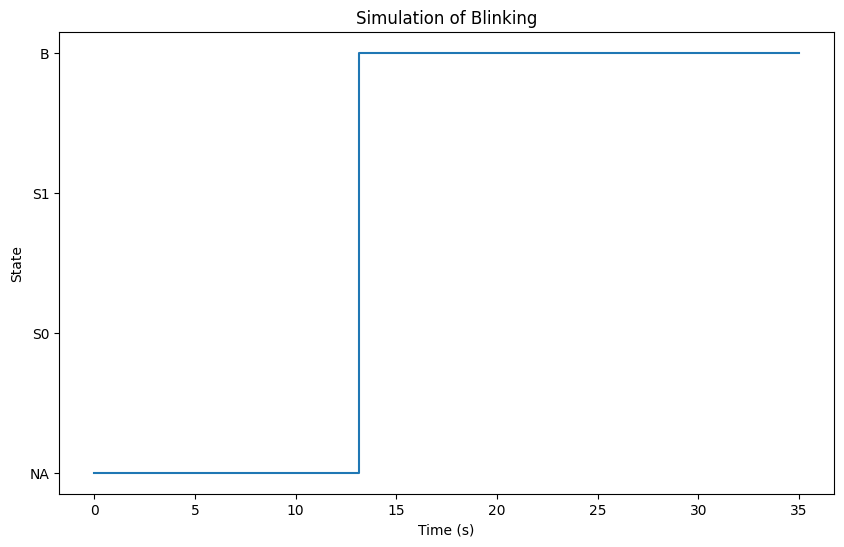

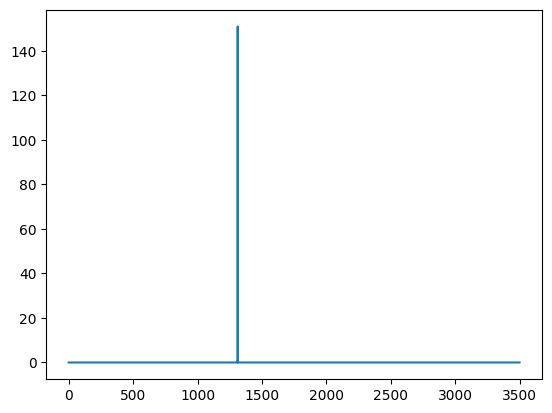

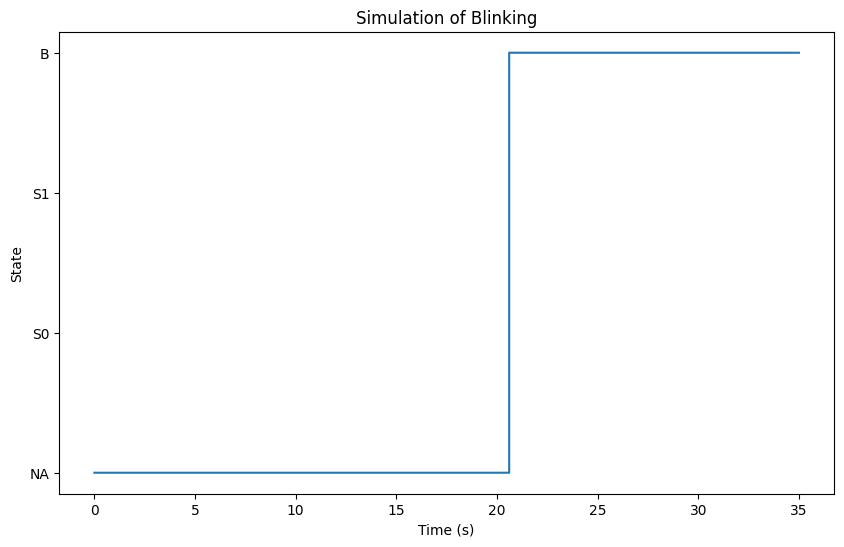

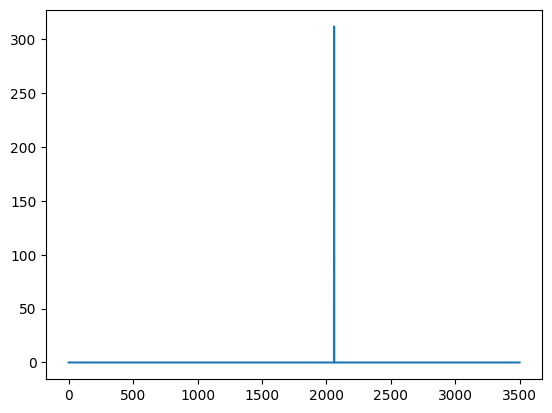

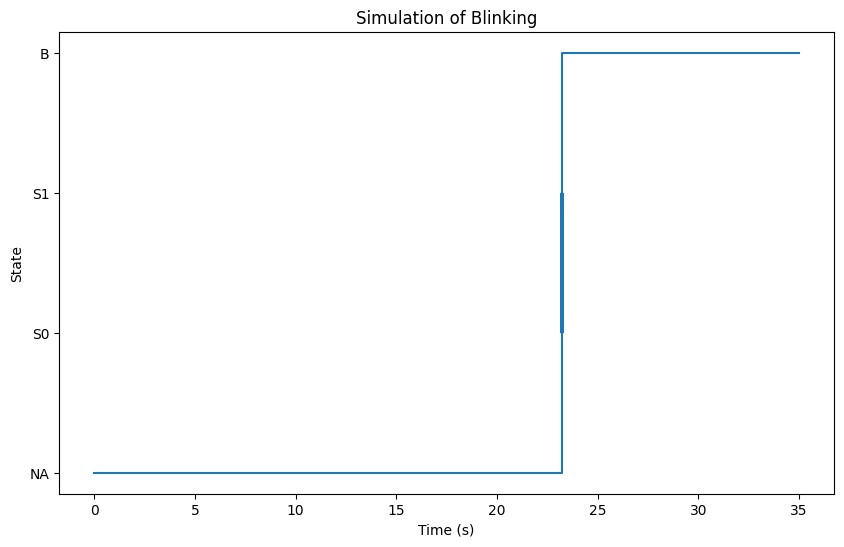

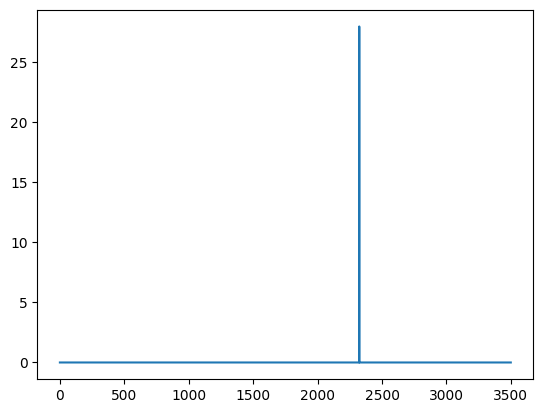

In [55]:
 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle


for j in range(29):
    # Example of the modified code to include a zoomed-in inset with a red box
    times, dynamics, Q, photons = simulate_protocol(experiment_setup, molecule)
    

    # Dynamics plot with zoomed-in inset
    fig, ax = plt.subplots(figsize=(10, 6))

    # Main plot
    ax.step(times, dynamics, where='post')

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('State')
    ax.set_title('Simulation of Blinking')
    ax.set_yticks([-1, 0, 1,2])
    ax.set_yticklabels(['NA', 'S0','S1',  'B'])

    # Saving the plot
    plt.show()

    plt.plot(photons)


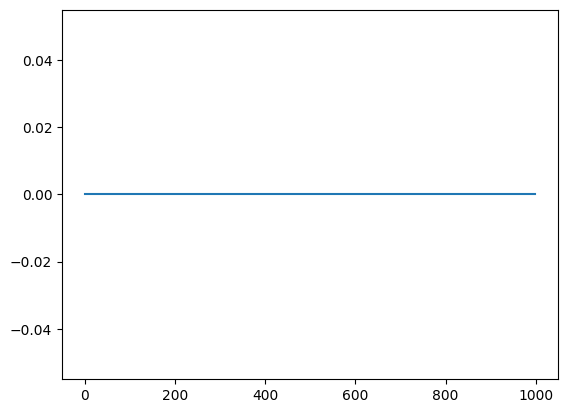